# Advance Regression Assignment

## Problem Statement:
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual values and flip them on at a higher price. For the same purpose, the company has collected a data set from the sale of houses in Australia.

The company is looking at prospective properties to buy to enter the market. You are required to build a regression model using regularisation in order to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know the following things about the prospective properties:

Which variables are significant in predicting the price of a house?

How well those variables describe the price of a house?

Also, determine the optimal value of lambda for ridge and lasso regression. 



## Business Goal
You are required to model the price of houses with the available independent variables. This model will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high returns. Further, the model will be a good way for management to understand the pricing dynamics of a new market.

### Data Sourcing

In [3]:
#Import Required Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


In [4]:
# Reading and loading the data
df=pd.read_csv('train.csv')
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
1         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      5   
2         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      9   
3         Lvl    AllPub  ...        0    NaN   NaN         NaN       0      2   
4         Lvl    AllPub  ...        0    NaN   NaN         NaN       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal     208500  
1   2007        WD         Normal     181500  
2   2008        WD         Normal     223500  
3   2006        WD        Abnorml     140000  
4   2008        WD         Normal     250000  

[5 rows x 81 columns]

In [5]:
#checking dimensions
df.shape

(1460, 81)

In [6]:
#checking cloumns info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

In [7]:
df.describe()

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[8 rows x 38 columns]

### Data Cleansing

In [8]:
#Checking duplicates
sum(df.duplicated(subset = 'Id')) == 0

True

In [9]:
#Checking for percentage nulls
round(100*(df.isnull().sum()/len(df.index)), 2)

Id                0.00
MSSubClass        0.00
MSZoning          0.00
LotFrontage      17.74
LotArea           0.00
                 ...  
MoSold            0.00
YrSold            0.00
SaleType          0.00
SaleCondition     0.00
SalePrice         0.00
Length: 81, dtype: float64

In [10]:
#Checking for outlier in the numerical columns
df.describe(percentiles=[.25,.5,.75,.90,.95,.99])

Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
90%    1314.100000   120.000000    96.000000   14381.700000     8.000000   
95%    1387.050000   160.000000   107.000000   17401.150000     8.000000   
99%    1445.410000   190.000000   141.000000   37567.640000    10.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  ...  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000  ...   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726  ...   
std       1.112799    30.202904     20.645407   181.066207   456.098091  ...   
min       1.000000  1872.000000   1950.000000     0.000000     0.000000  ...   
25%       5.000000  1954.000000   1967.000000     0.000000     0.000000  ...   
50%       5.000000  1973.000000   1994.000000     0.000000   383.500000  ...   
75%       6.000000  2000.000000   2004.000000   166.000000   712.250000  ...   
90%       7.000000  2006.000000   2006.000000   335.000000  1065.500000  ...   
95%       8.000000  2007.000000   2007.000000   456.000000  1274.000000  ...   
99%       9.000000  2009.000000   2009.000000   791.920000  1572.410000  ...   
max       9.000000  2010.000000   2010.000000  1600.000000  5644.000000  ...   

        WoodDeckSF  OpenPorchSF  EnclosedPorch    3SsnPorch  ScreenPorch  \
count  1460.000000  1460.000000    1460.000000  1460.000000  1460.000000   
mean     94.244521    46.660274      21.954110     3.409589    15.060959   
std     125.338794    66.256028      61.119149    29.317331    55.757415   
min       0.000000     0.000000       0.000000     0.000000     0.000000   
25%       0.000000     0.000000       0.000000     0.000000     0.000000   
50%       0.000000    25.000000       0.000000     0.000000     0.000000   
75%     168.000000    68.000000       0.000000     0.000000     0.000000   
90%     262.000000   130.000000     112.000000     0.000000     0.000000   
95%     335.000000   175.050000     180.150000     0.000000   160.000000   
99%     505.460000   285.820000     261.050000   168.000000   268.050000   
max     857.000000   547.000000     552.000000   508.000000   480.000000   

          PoolArea       MiscVal       MoSold       YrSold      SalePrice  
count  1460.000000   1460.000000  1460.000000  1460.000000    1460.000000  
mean      2.758904     43.489041     6.321918  2007.815753  180921.195890  
std      40.177307    496.123024     2.703626     1.328095   79442.502883  
min       0.000000      0.000000     1.000000  2006.000000   34900.000000  
25%       0.000000      0.000000     5.000000  2007.000000  129975.000000  
50%       0.000000      0.000000     6.000000  2008.000000  163000.000000  
75%       0.000000      0.000000     8.000000  2009.000000  214000.000000  
90%       0.000000      0.000000    10.000000  2010.000000  278000.000000  
95%       0.000000      0.000000    11.000000  2010.000000  326100.000000  
99%       0.000000    700.000000    12.000000  2010.000000  442567.010000  
max     738.000000  15500.000000    12.000000  2010.000000  755000.000000  

[11 rows x 38 columns]

In [11]:
#Checking null values and clubbing them together.
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

PoolQC          99.520548
MiscFeature     96.301370
Alley           93.767123
Fence           80.753425
MasVnrType      59.726027
FireplaceQu     47.260274
LotFrontage     17.739726
GarageType       5.547945
GarageYrBlt      5.547945
GarageFinish     5.547945
GarageQual       5.547945
GarageCond       5.547945
BsmtFinType2     2.602740
BsmtExposure     2.602740
BsmtFinType1     2.534247
BsmtCond         2.534247
BsmtQual         2.534247
MasVnrArea       0.547945
Electrical       0.068493
dtype: float64

In [12]:
# As per data dictionary we eill first replace null vlaues of categorical variable by replacing them with none.

null_with_meaning = ["Alley", "MasVnrType", "BsmtQual", "BsmtCond", "BsmtExposure", "BsmtFinType1", "BsmtFinType2", "FireplaceQu", "GarageType", "GarageFinish", "GarageQual", "GarageCond", "PoolQC", "Fence", "MiscFeature"]
for i in null_with_meaning:
    df[i].fillna("none", inplace=True)

In [13]:
#Checking for null values again
df.columns[df.isnull().any()] 

null = df.isnull().sum()/len(df)*100
null = null[null>0]
null.sort_values(inplace=True, ascending=False)
null

LotFrontage    17.739726
GarageYrBlt     5.547945
MasVnrArea      0.547945
Electrical      0.068493
dtype: float64

In [14]:
# Will check these columns one by one
df['LotFrontage'].describe()

count    1201.000000
mean       70.049958
std        24.284752
min        21.000000
25%        59.000000
50%        69.000000
75%        80.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [16]:
df['GarageYrBlt'].describe()

count    1379.000000
mean     1978.506164
std        24.689725
min      1900.000000
25%      1961.000000
50%      1980.000000
75%      2002.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [18]:
df['MasVnrArea'].describe()

count    1452.000000
mean      103.685262
std       181.066207
min         0.000000
25%         0.000000
50%         0.000000
75%       166.000000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [20]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

In [25]:
df["LotFrontage"].fillna(df["LotFrontage"].median(), inplace=True)
df["GarageYrBlt"].fillna(df["GarageYrBlt"].median(), inplace=True)
df["MasVnrArea"].fillna(df["MasVnrArea"].median(), inplace=True)
df["Electrical"].dropna(inplace=True)

In [26]:
# Crosschecking the updated columns again
df['LotFrontage'].describe()

count    1460.000000
mean       69.863699
std        22.027677
min        21.000000
25%        60.000000
50%        69.000000
75%        79.000000
max       313.000000
Name: LotFrontage, dtype: float64

In [27]:
df['GarageYrBlt'].describe()

count    1460.000000
mean     1978.589041
std        23.997022
min      1900.000000
25%      1962.000000
50%      1980.000000
75%      2001.000000
max      2010.000000
Name: GarageYrBlt, dtype: float64

In [28]:
df['MasVnrArea'].describe()

count    1460.000000
mean      103.117123
std       180.731373
min         0.000000
25%         0.000000
50%         0.000000
75%       164.250000
max      1600.000000
Name: MasVnrArea, dtype: float64

In [29]:
df['Electrical'].describe()

count      1459
unique        5
top       SBrkr
freq       1334
Name: Electrical, dtype: object

### EDA on cleasned dataset

In [31]:
#Checking all numeric (float and int) variables in the dataset
data_numeric = df.select_dtypes(include=['float64', 'int64'])
data_numeric.head()

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0   1          60         65.0     8450            7            5       2003   
1   2          20         80.0     9600            6            8       1976   
2   3          60         68.0    11250            7            5       2001   
3   4          70         60.0     9550            7            5       1915   
4   5          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  OpenPorchSF  \
0          2003       196.0         706  ...           0           61   
1          1976         0.0         978  ...         298            0   
2          2002       162.0         486  ...           0           42   
3          1970         0.0         216  ...           0           35   
4          2000       350.0         655  ...         192           84   

   EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  MoSold  YrSold  \
0              0          0            0         0        0       2    2008   
1              0          0            0         0        0       5    2007   
2              0          0            0         0        0       9    2008   
3            272          0            0         0        0       2    2006   
4              0          0            0         0        0      12    2008   

   SalePrice  
0     208500  
1     181500  
2     223500  
3     140000  
4     250000  

[5 rows x 38 columns]

In [32]:
# Dropping ID Column as it has no significance in prediction
data_numeric = data_numeric.drop(['Id'], axis=1)
data_numeric.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  YearBuilt  \
0          60         65.0     8450            7            5       2003   
1          20         80.0     9600            6            8       1976   
2          60         68.0    11250            7            5       2001   
3          70         60.0     9550            7            5       1915   
4          60         84.0    14260            8            5       2000   

   YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  ...  WoodDeckSF  \
0          2003       196.0         706           0  ...           0   
1          1976         0.0         978           0  ...         298   
2          2002       162.0         486           0  ...           0   
3          1970         0.0         216           0  ...           0   
4          2000       350.0         655           0  ...         192   

   OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0           61              0          0            0         0        0   
1            0              0          0            0         0        0   
2           42              0          0            0         0        0   
3           35            272          0            0         0        0   
4           84              0          0            0         0        0   

   MoSold  YrSold  SalePrice  
0       2    2008     208500  
1       5    2007     181500  
2       9    2008     223500  
3       2    2006     140000  
4      12    2008     250000  

[5 rows x 37 columns]

#### Plotting Target variable 'sale Price' vs a few select columns

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24]),
 [Text(0, 0, 'CollgCr'),
  Text(1, 0, 'Veenker'),
  Text(2, 0, 'Crawfor'),
  Text(3, 0, 'NoRidge'),
  Text(4, 0, 'Mitchel'),
  Text(5, 0, 'Somerst'),
  Text(6, 0, 'NWAmes'),
  Text(7, 0, 'OldTown'),
  Text(8, 0, 'BrkSide'),
  Text(9, 0, 'Sawyer'),
  Text(10, 0, 'NridgHt'),
  Text(11, 0, 'NAmes'),
  Text(12, 0, 'SawyerW'),
  Text(13, 0, 'IDOTRR'),
  Text(14, 0, 'MeadowV'),
  Text(15, 0, 'Edwards'),
  Text(16, 0, 'Timber'),
  Text(17, 0, 'Gilbert'),
  Text(18, 0, 'StoneBr'),
  Text(19, 0, 'ClearCr'),
  Text(20, 0, 'NPkVill'),
  Text(21, 0, 'Blmngtn'),
  Text(22, 0, 'BrDale'),
  Text(23, 0, 'SWISU'),
  Text(24, 0, 'Blueste')])

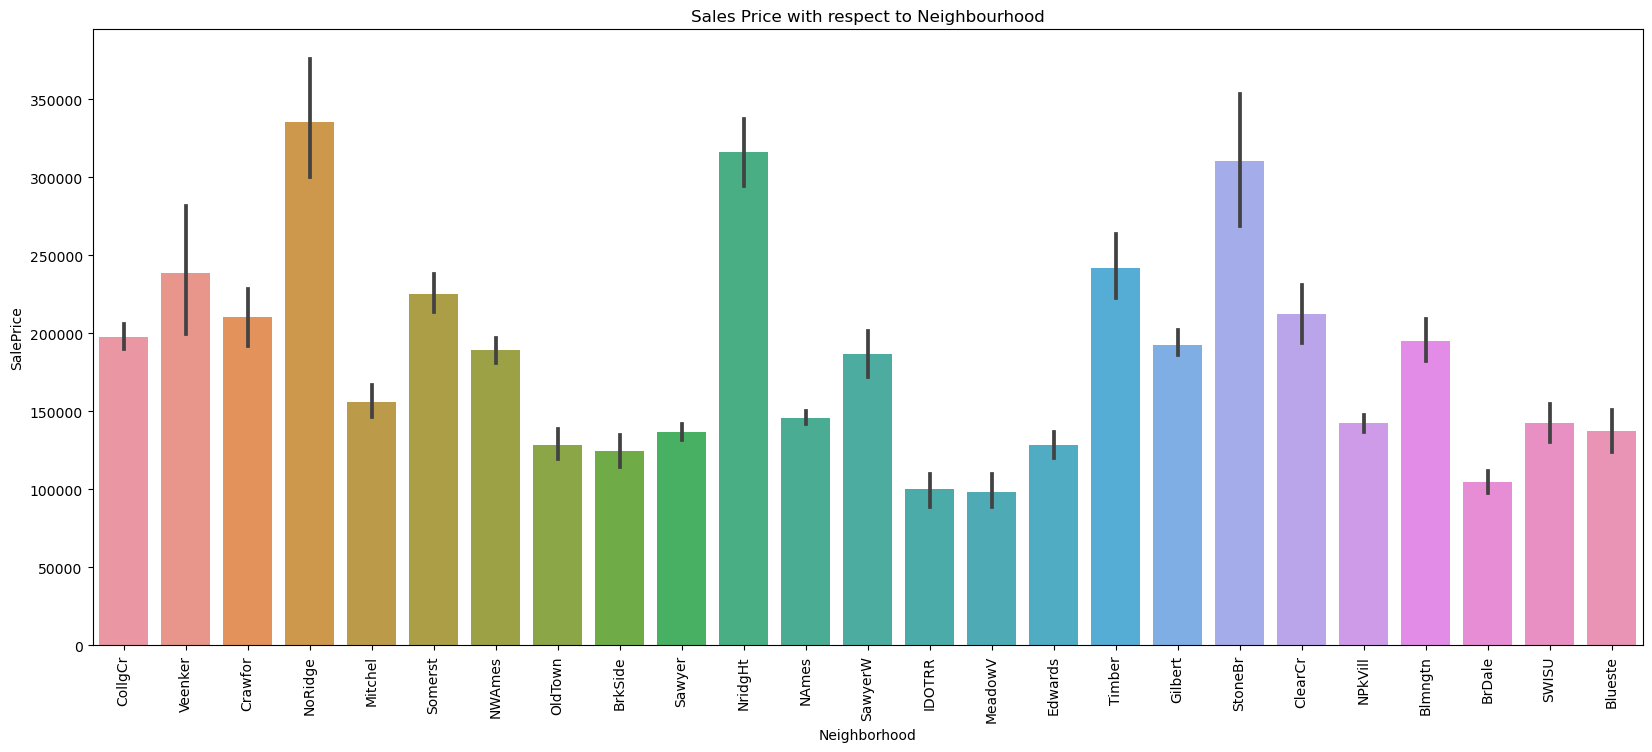

In [34]:
#plot 'Sale Price' with respect to 'Neighborhood'

plt.figure(figsize=(20, 8))
sns.barplot(x="Neighborhood", y="SalePrice", data= df)
plt.title("Sales Price with respect to Neighbourhood")
plt.xticks(rotation=90)

Inference- Properties in few neighbourhoods are high price

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9')])

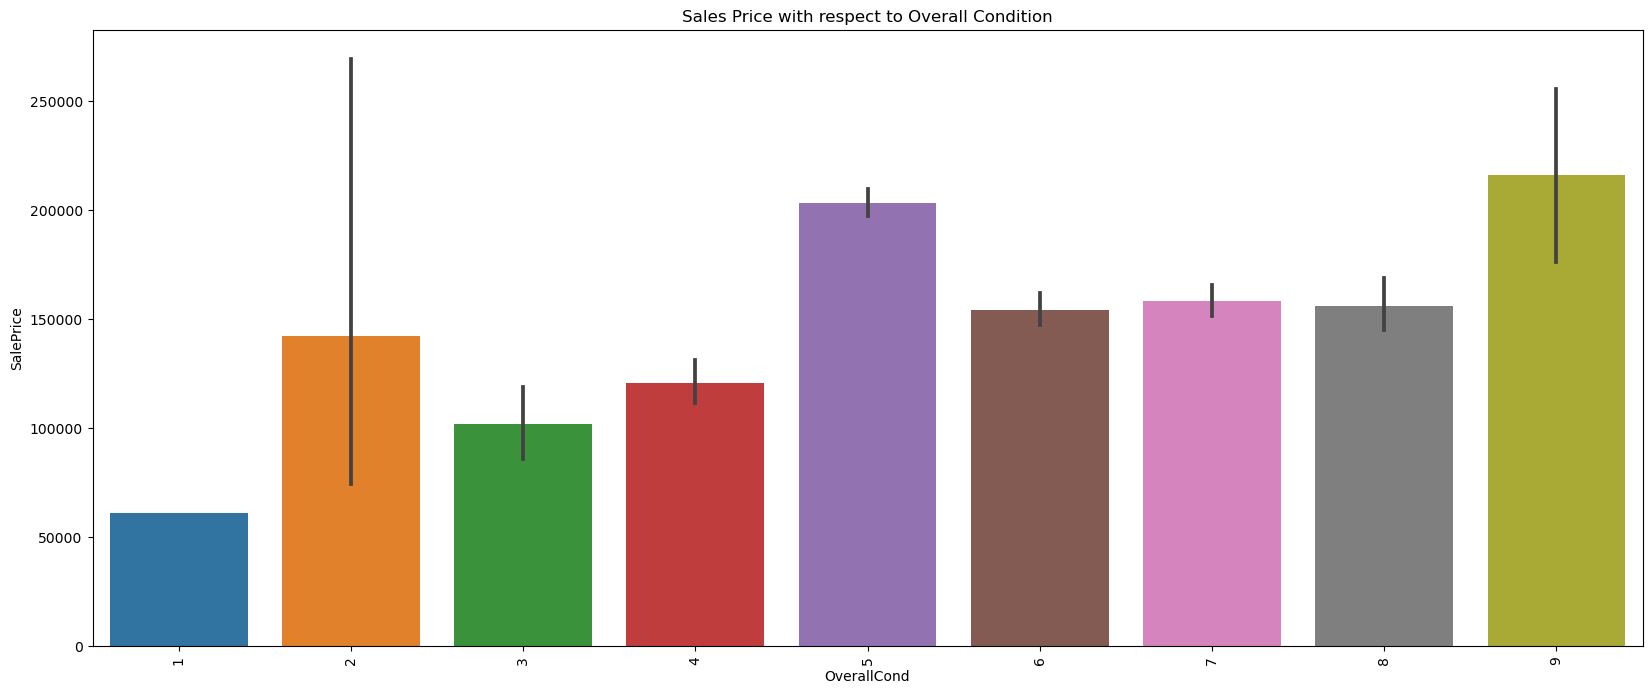

In [35]:
# plot 'overall condition' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallCond", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Condition")
plt.xticks(rotation=90)

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, '1'),
  Text(1, 0, '2'),
  Text(2, 0, '3'),
  Text(3, 0, '4'),
  Text(4, 0, '5'),
  Text(5, 0, '6'),
  Text(6, 0, '7'),
  Text(7, 0, '8'),
  Text(8, 0, '9'),
  Text(9, 0, '10')])

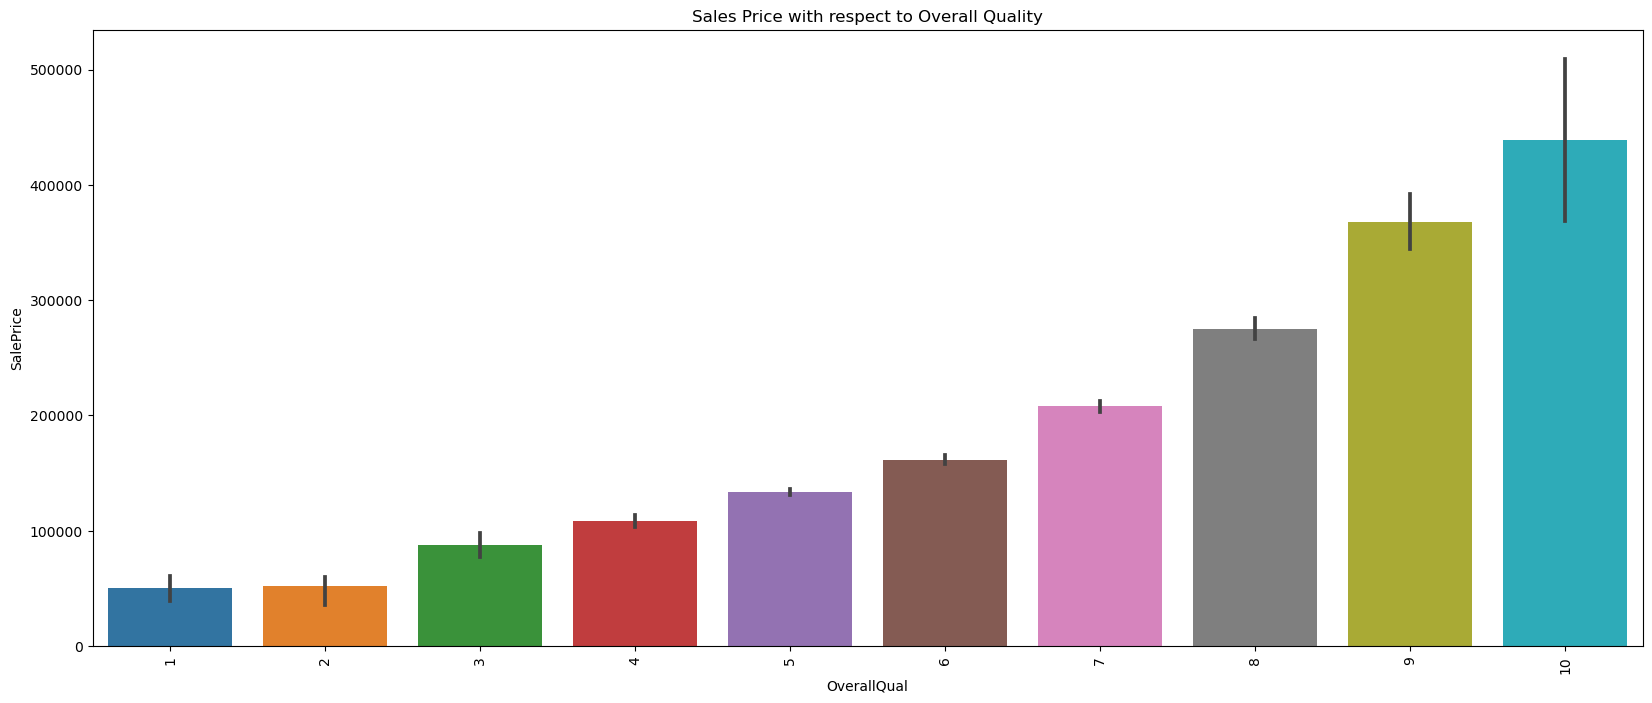

In [36]:
# plot 'overall quality' with respect to 'Saleprice'

plt.figure(figsize=(20, 8))
sns.barplot(x="OverallQual", y="SalePrice", data= df)
plt.title("Sales Price with respect to Overall Quality")
plt.xticks(rotation=90)

#### Inference - Increase in the overall quality has a direct positive effect on the sale price

<Axes: xlabel='SalePrice', ylabel='Density'>

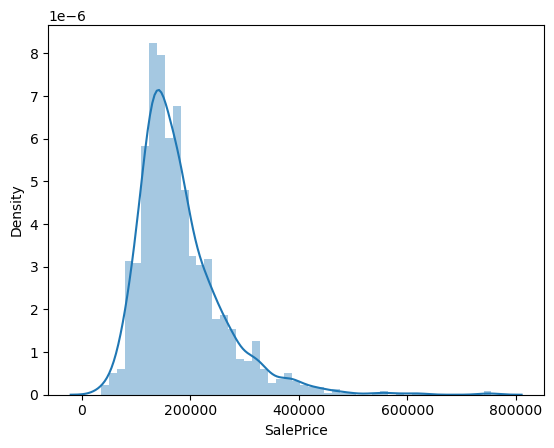

In [37]:
sns.distplot(df['SalePrice'])

In [38]:
data_raw = df.copy

#### Applying the log transform to obtain a centralized data

In [39]:
#Log Transformation
df['SalePrice']=np.log1p(df['SalePrice'])

<Axes: xlabel='SalePrice', ylabel='Density'>

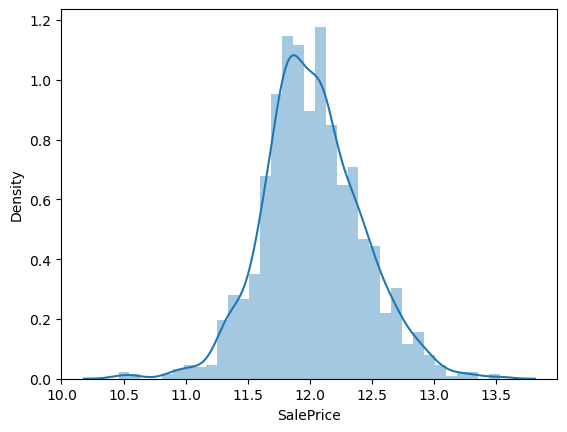

In [40]:
sns.distplot(df['SalePrice'])

In [41]:
# correlation matrix
cor = data_numeric.corr()
cor

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  \
MSSubClass       1.000000    -0.356718 -0.139781     0.032628    -0.059316   
LotFrontage     -0.356718     1.000000  0.304522     0.234812    -0.053281   
LotArea         -0.139781     0.304522  1.000000     0.105806    -0.005636   
OverallQual      0.032628     0.234812  0.105806     1.000000    -0.091932   
OverallCond     -0.059316    -0.053281 -0.005636    -0.091932     1.000000   
YearBuilt        0.027850     0.116685  0.014228     0.572323    -0.375983   
YearRemodAdd     0.040581     0.083348  0.013788     0.550684     0.073741   
MasVnrArea       0.023573     0.178469  0.103321     0.407252    -0.125694   
BsmtFinSF1      -0.069836     0.214367  0.214103     0.239666    -0.046231   
BsmtFinSF2      -0.065649     0.042463  0.111170    -0.059119     0.040229   
BsmtUnfSF       -0.140759     0.124098 -0.002618     0.308159    -0.136841   
TotalBsmtSF     -0.238518     0.363472  0.260833     0.537808    -0.171098   
1stFlrSF        -0.251758     0.413773  0.299475     0.476224    -0.144203   
2ndFlrSF         0.307886     0.072388  0.050986     0.295493     0.028942   
LowQualFinSF     0.046474     0.037469  0.004779    -0.030429     0.025494   
GrLivArea        0.074853     0.368007  0.263116     0.593007    -0.079686   
BsmtFullBath     0.003491     0.090343  0.158155     0.111098    -0.054942   
BsmtHalfBath    -0.002333    -0.006979  0.048046    -0.040150     0.117821   
FullBath         0.131608     0.180534  0.126031     0.550600    -0.194149   
HalfBath         0.177354     0.047222  0.014259     0.273458    -0.060769   
BedroomAbvGr    -0.023438     0.236840  0.119690     0.101676     0.012980   
KitchenAbvGr     0.281721    -0.004905 -0.017784    -0.183882    -0.087001   
TotRmsAbvGrd     0.040380     0.320518  0.190015     0.427452    -0.057583   
Fireplaces      -0.045569     0.233221  0.271364     0.396765    -0.023820   
GarageYrBlt      0.081396     0.062996 -0.025865     0.514231    -0.306276   
GarageCars      -0.040110     0.269539  0.154871     0.600671    -0.185758   
GarageArea      -0.098672     0.323511  0.180403     0.562022    -0.151521   
WoodDeckSF      -0.012579     0.075542  0.171698     0.238923    -0.003334   
OpenPorchSF     -0.006100     0.137014  0.084774     0.308819    -0.032589   
EnclosedPorch   -0.012037     0.010287 -0.018340    -0.113937     0.070356   
3SsnPorch       -0.043825     0.061945  0.020423     0.030371     0.025504   
ScreenPorch     -0.026030     0.037655  0.043160     0.064886     0.054811   
PoolArea         0.008283     0.180819  0.077672     0.065166    -0.001985   
MiscVal         -0.007683    -0.000255  0.038068    -0.031406     0.068777   
MoSold          -0.013585     0.010451  0.001205     0.070815    -0.003511   
YrSold          -0.021407     0.006380 -0.014261    -0.027347     0.043950   
SalePrice       -0.084284     0.334771  0.263843     0.790982    -0.077856   

               YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  BsmtFinSF2  \
MSSubClass      0.027850      0.040581    0.023573   -0.069836   -0.065649   
LotFrontage     0.116685      0.083348    0.178469    0.214367    0.042463   
LotArea         0.014228      0.013788    0.103321    0.214103    0.111170   
OverallQual     0.572323      0.550684    0.407252    0.239666   -0.059119   
OverallCond    -0.375983      0.073741   -0.125694   -0.046231    0.040229   
YearBuilt       1.000000      0.592855    0.311600    0.249503   -0.049107   
YearRemodAdd    0.592855      1.000000    0.176529    0.128451   -0.067759   
MasVnrArea      0.311600      0.176529    1.000000    0.261256   -0.071330   
BsmtFinSF1      0.249503      0.128451    0.261256    1.000000   -0.050117   
BsmtFinSF2     -0.049107     -0.067759   -0.071330   -0.050117    1.000000   
BsmtUnfSF       0.149040      0.181133    0.113862   -0.495251   -0.209294   
TotalBsmtSF     0.391452      0.291066    0.360067    0.522396    0.104810   
1stFlrSF        0.281986      0.2403

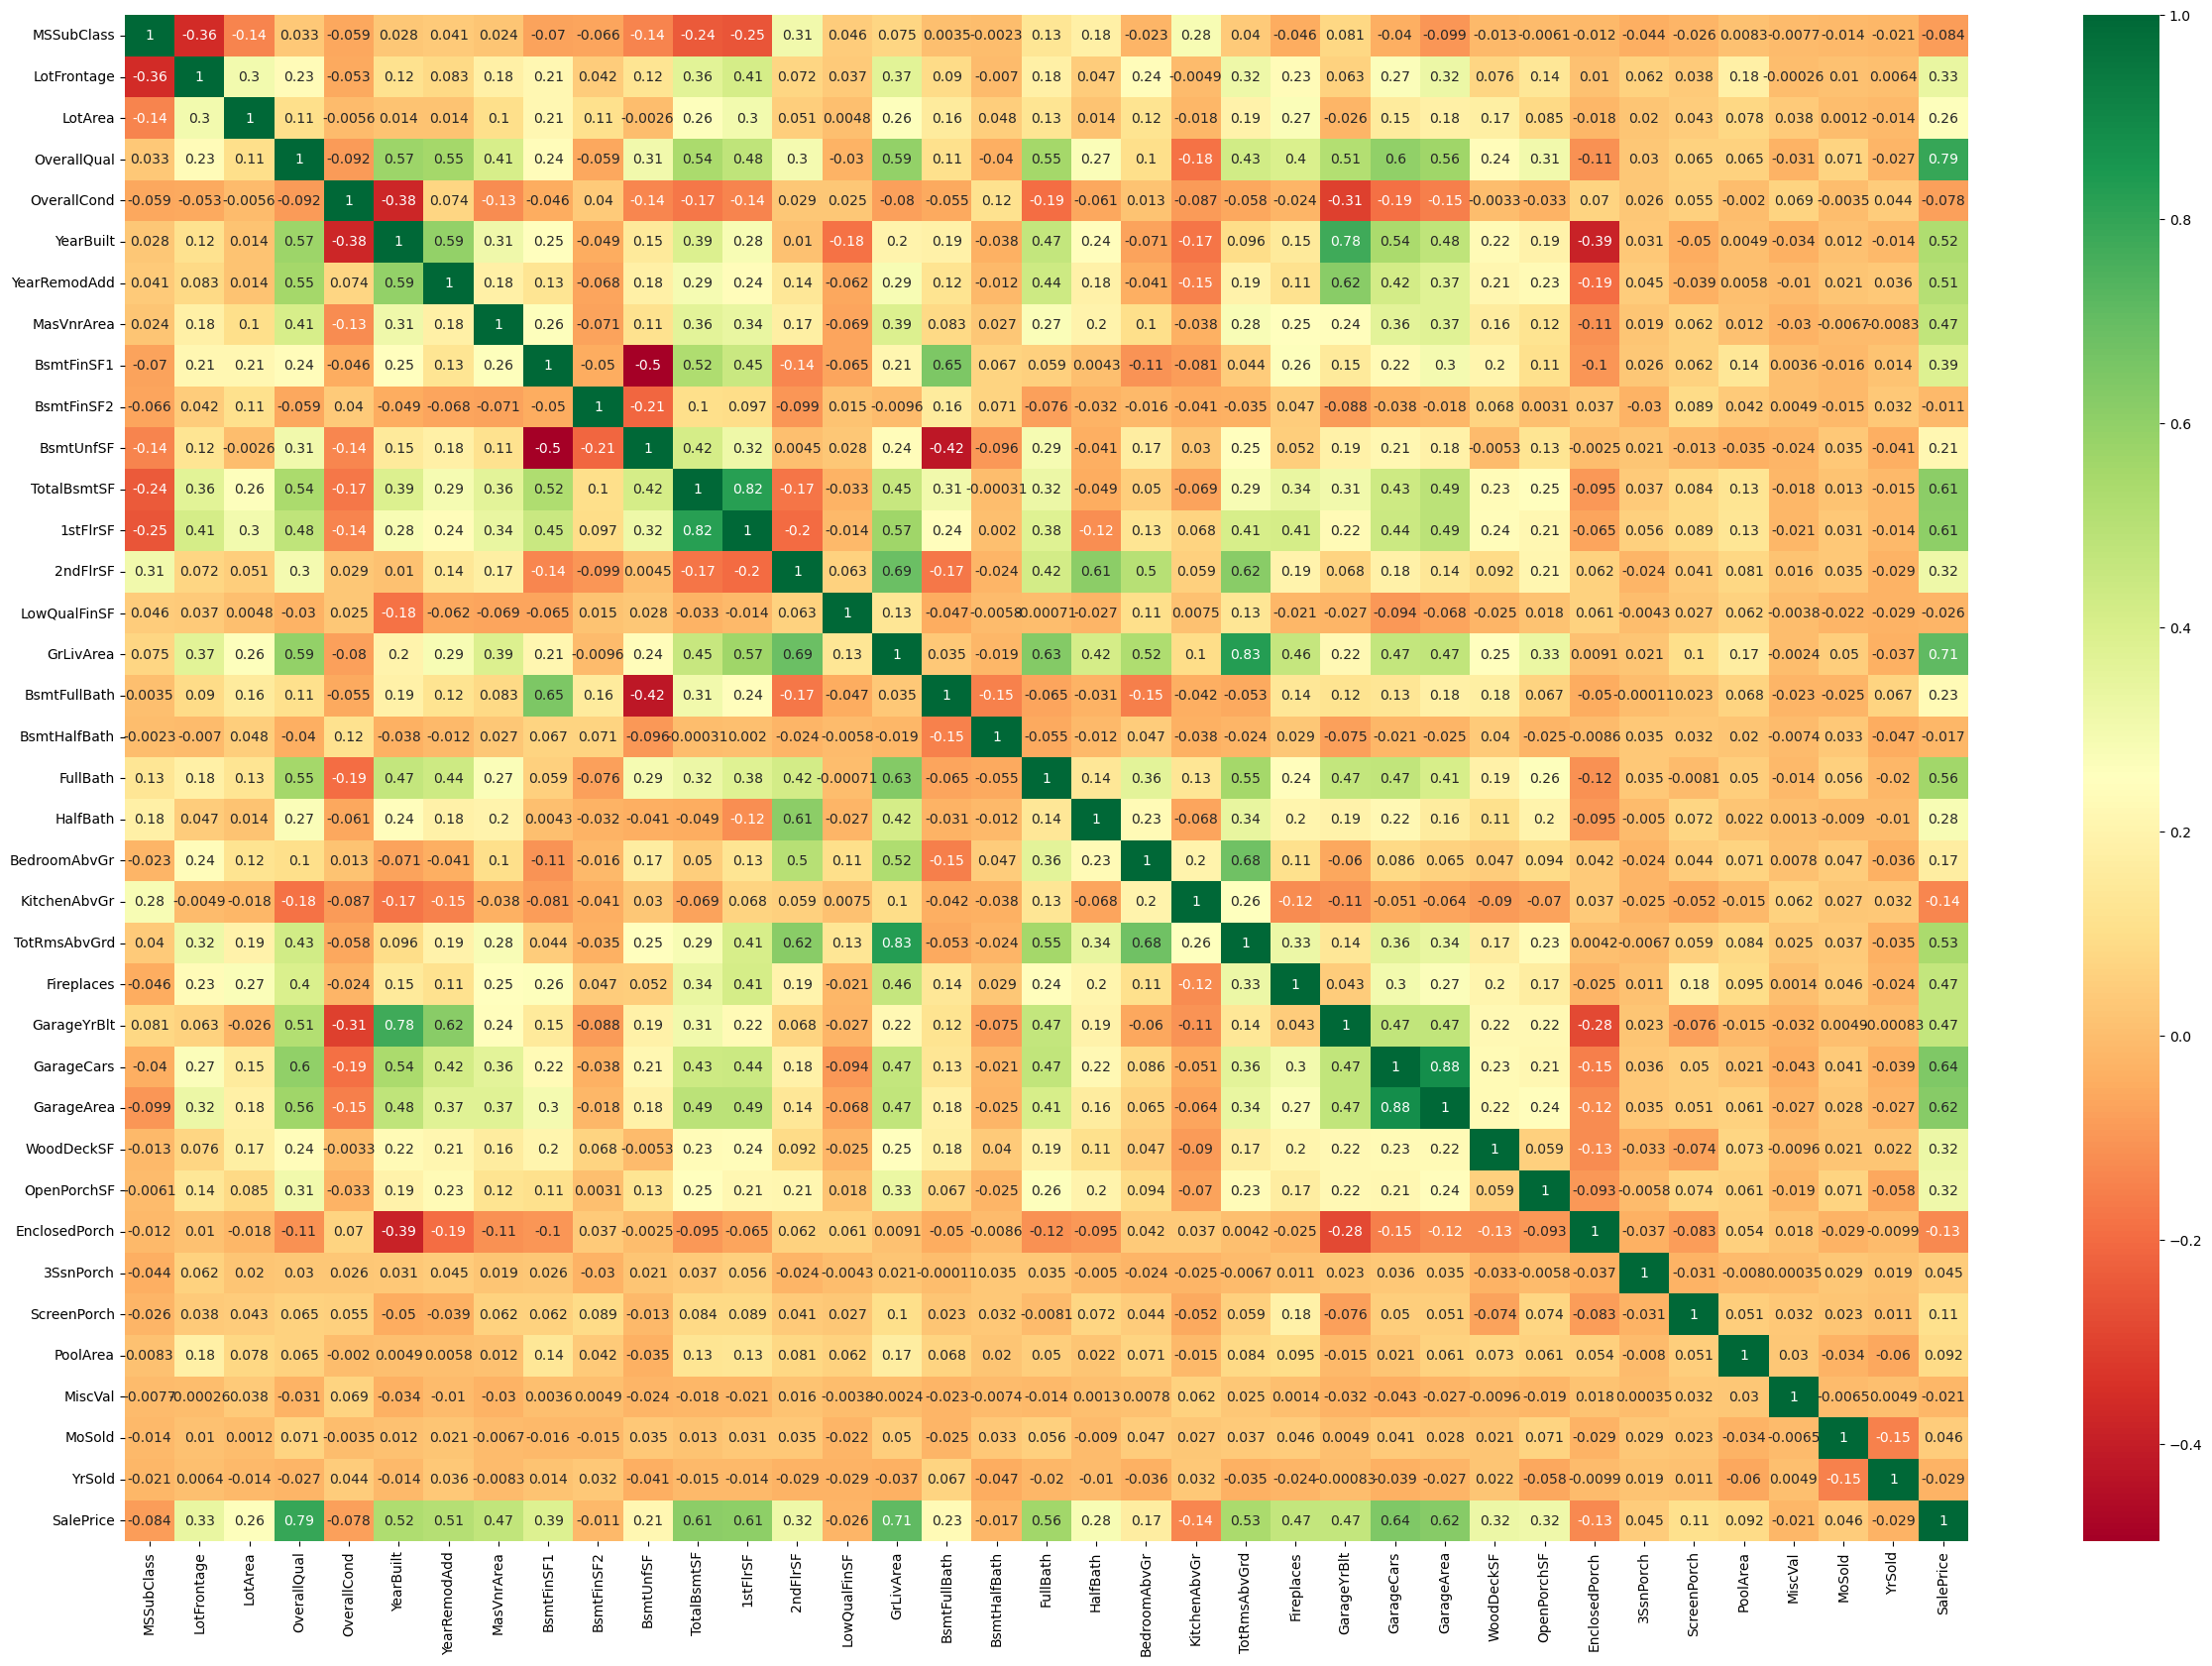

In [44]:
# plotting correlations on a heatmap

# figure size
plt.figure(figsize=(30,20))

# heatmap
sns.heatmap(cor, cmap="RdYlGn", annot=True)
plt.show()

##### We can see that some of the variables are correlated. Before dropping these columns, we will first check their predictive power

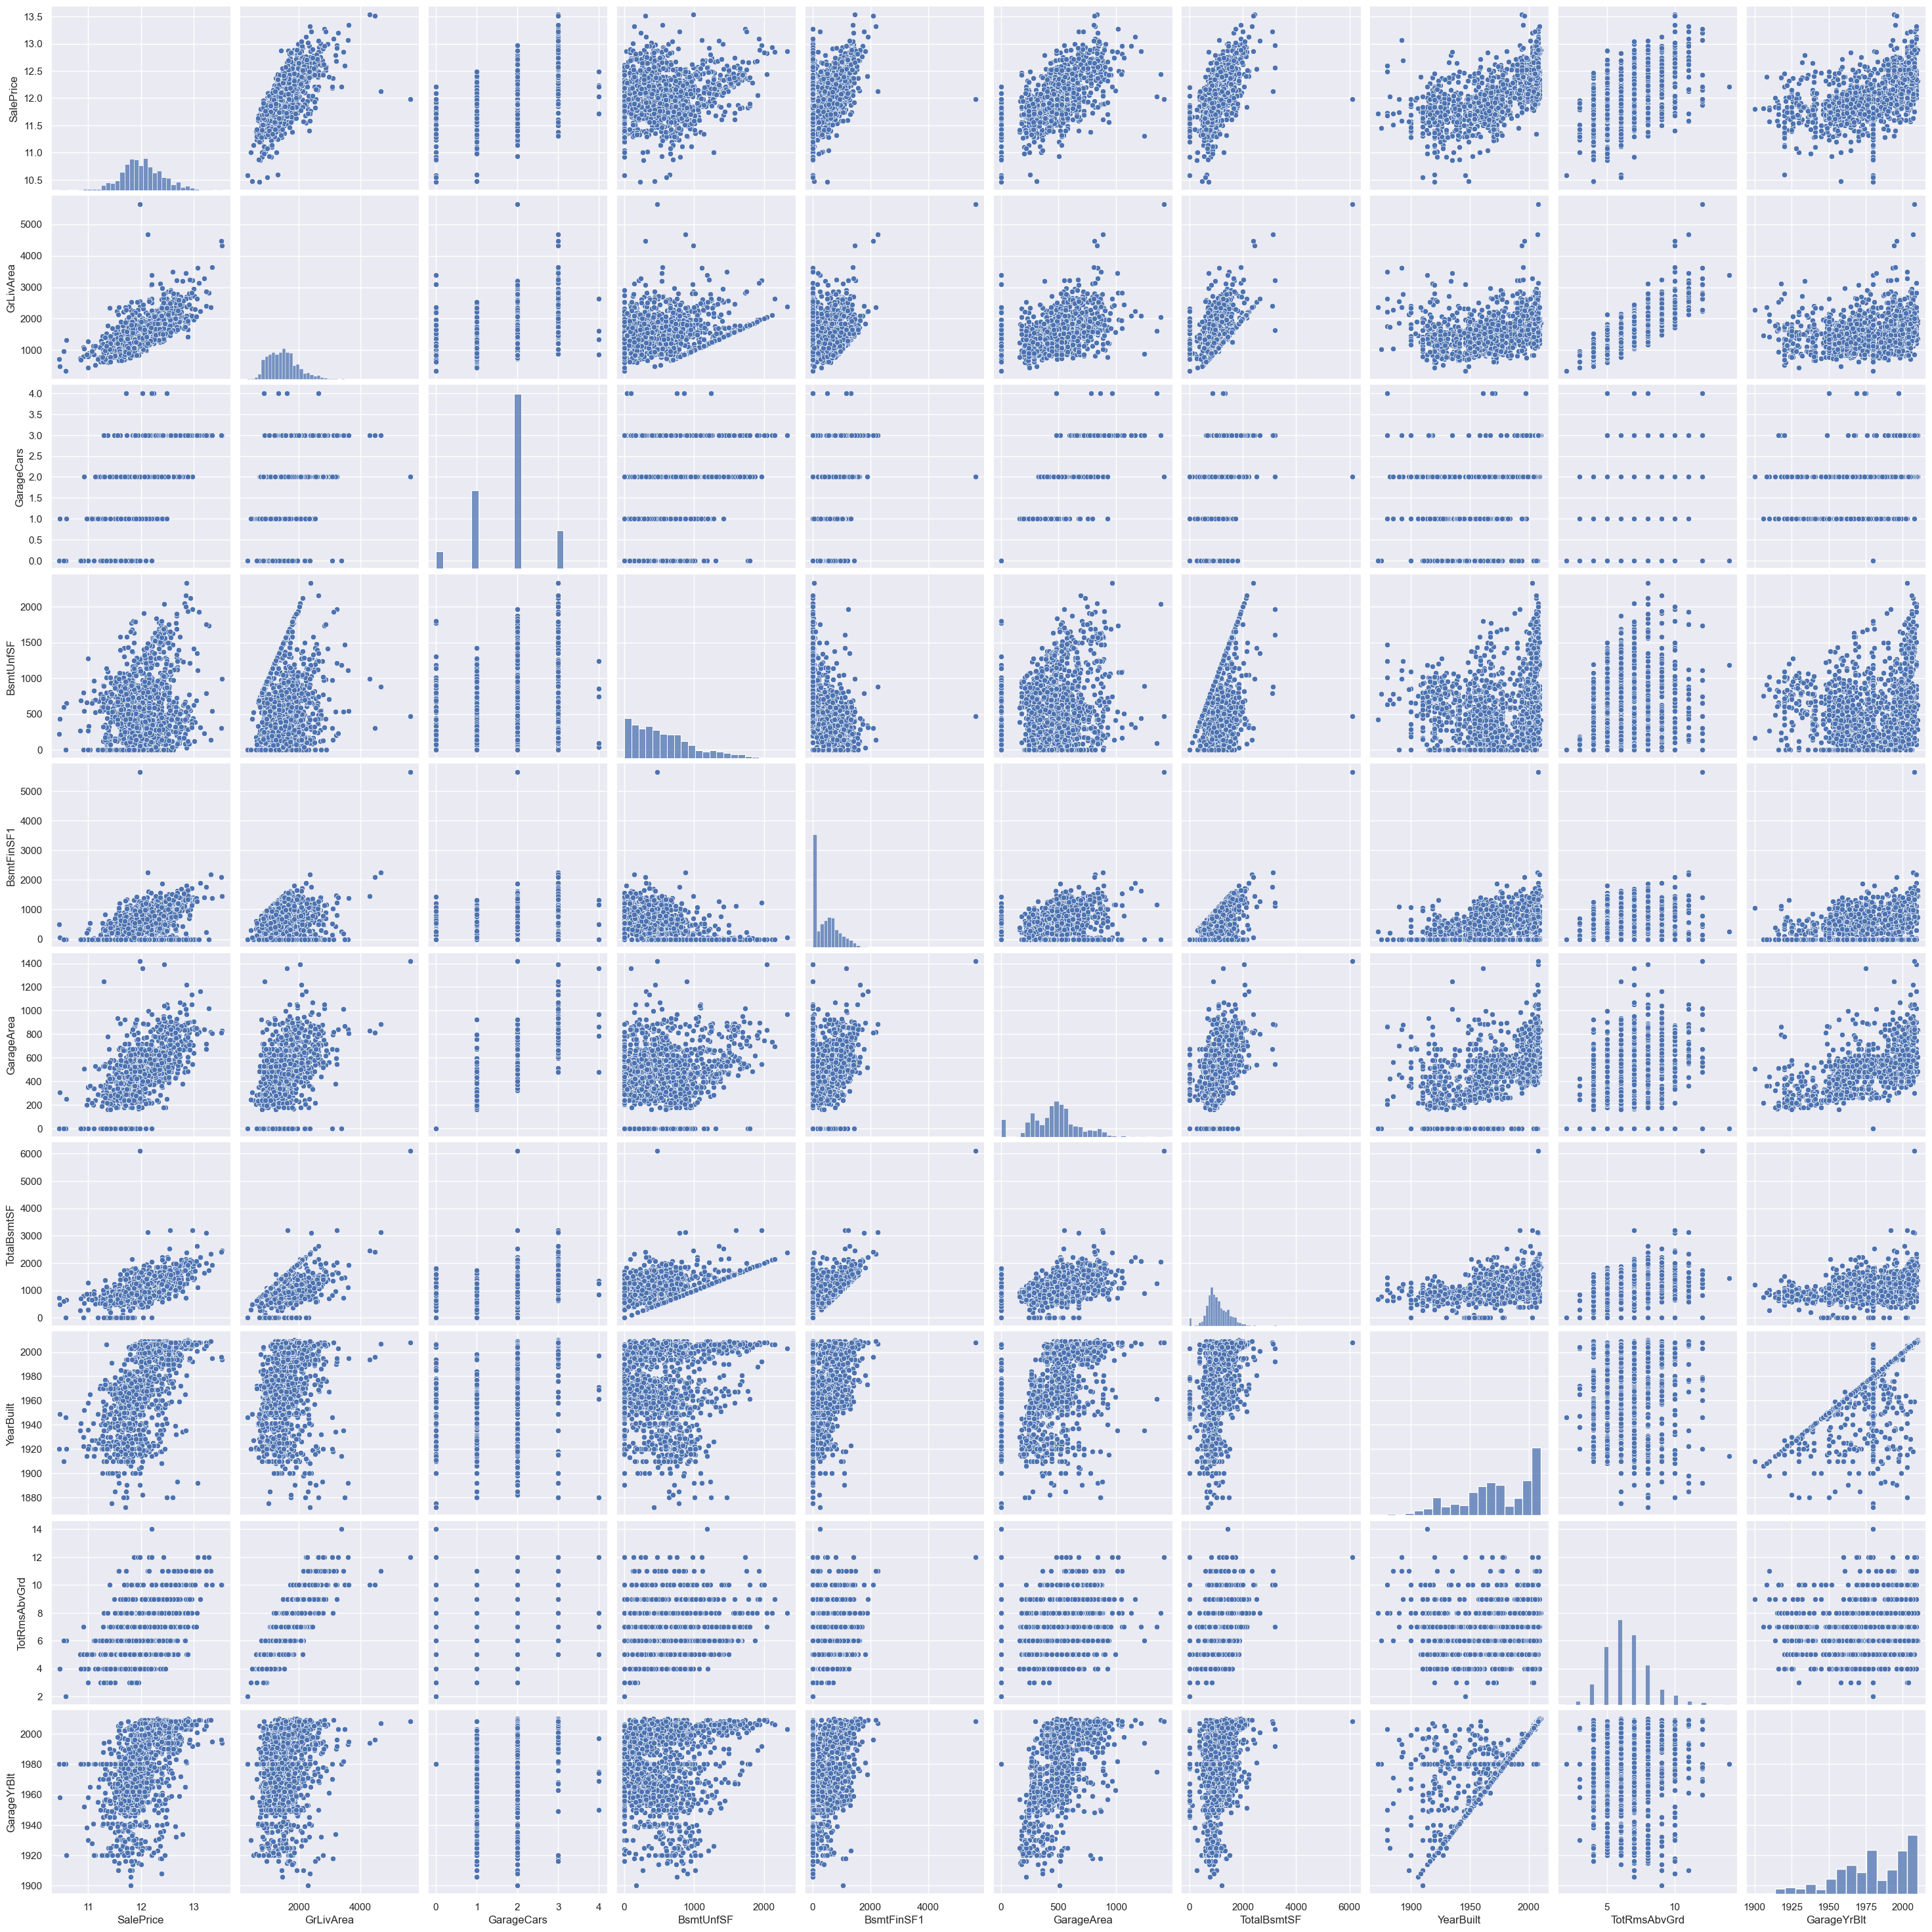

In [45]:
# Checking the same with a pairplot 
sns.set()
cols = ['SalePrice', 'GrLivArea', 'GarageCars', 'BsmtUnfSF', 'BsmtFinSF1', 'GarageArea', 'TotalBsmtSF', 'YearBuilt', 'TotRmsAbvGrd', 'GarageYrBlt']
sns.pairplot(df[cols], size = 3)
plt.show()

In [46]:
#Droping columns that are correlated and not contributing to 'SalePrice'
df = df.drop(['GarageCars'], axis = 1)
df = df.drop(['BsmtUnfSF'], axis = 1)
df = df.drop(['TotRmsAbvGrd'], axis = 1)
df = df.drop(['GarageYrBlt'], axis = 1)    

df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolArea PoolQC Fence MiscFeature MiscVal MoSold  \
0         Lvl    AllPub  ...        0   none  none        none       0      2   
1         Lvl    AllPub  ...        0   none  none        none       0      5   
2         Lvl    AllPub  ...        0   none  none        none       0      9   
3         Lvl    AllPub  ...        0   none  none        none       0      2   
4         Lvl    AllPub  ...        0   none  none        none       0     12   

  YrSold  SaleType  SaleCondition  SalePrice  
0   2008        WD         Normal  12.247699  
1   2007        WD         Normal  12.109016  
2   2008        WD         Normal  12.317171  
3   2006        WD        Abnorml  11.849405  
4   2008        WD         Normal  12.429220  

[5 rows x 77 columns]

In [47]:
#Numeric columns only
df.select_dtypes(exclude=['object'])

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      YearBuilt  YearRemodAdd  MasVnrArea  BsmtFinSF1  ...  WoodDeckSF  \
0          2003          2003       196.0         706  ...           0   
1          1976          1976         0.0         978  ...         298   
2          2001          2002       162.0         486  ...           0   
3          1915          1970         0.0         216  ...           0   
4          2000          2000       350.0         655  ...         192   
...         ...           ...         ...         ...  ...         ...   
1455       1999          2000         0.0           0  ...           0   
1456       1978          1988       119.0         790  ...         349   
1457       1941          2006         0.0         275  ...           0   
1458       1950          1996         0.0          49  ...         366   
1459       1965          1965         0.0         830  ...         736   

      OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  PoolArea  MiscVal  \
0              61              0          0            0         0        0   
1               0              0          0            0         0        0   
2              42              0          0            0         0        0   
3              35            272          0            0         0        0   
4              84              0          0            0         0        0   
...           ...            ...        ...          ...       ...      ...   
1455           40              0          0            0         0        0   
1456            0              0          0            0         0        0   
1457           60              0          0            0         0     2500   
1458            0            112          0            0         0        0   
1459           68              0          0            0         0        0   

      MoSold  YrSold  SalePrice  
0          2    2008  12.247699  
1          5    2007  12.109016  
2          9    2008  12.317171  
3          2    2006  11.849405  
4         12    2008  12.429220  
...      ...     ...        ...  
1455       8    2007  12.072547  
1456       2    2010  12.254868  
1457       5    2010  12.493133  
1458       4    2010  11.864469  
1459       6    2008  11.901590  

[1460 rows x 34 columns]

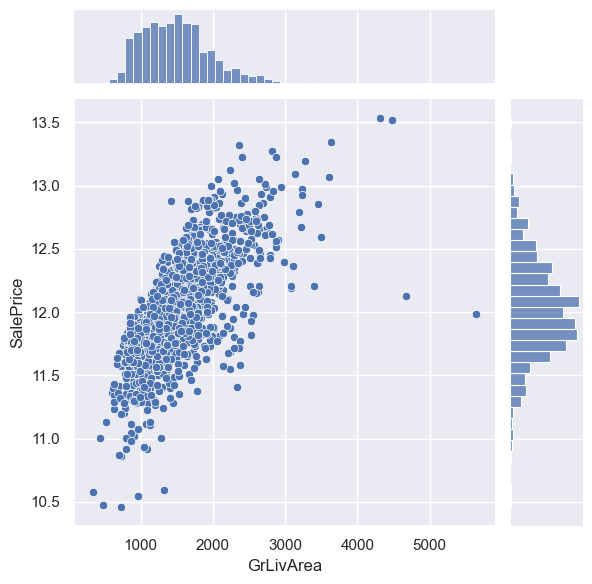

In [48]:
# Analyse some important numeric columns
sns.jointplot(x='GrLivArea', y='SalePrice', data=df)
plt.show()

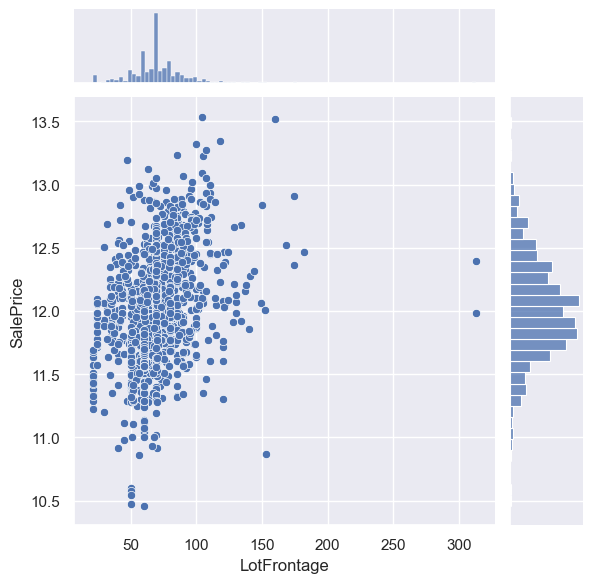

In [52]:
# Lot frontage vs SalePrice 
sns.jointplot(x = df['LotFrontage'], y = df['SalePrice'])
plt.show()

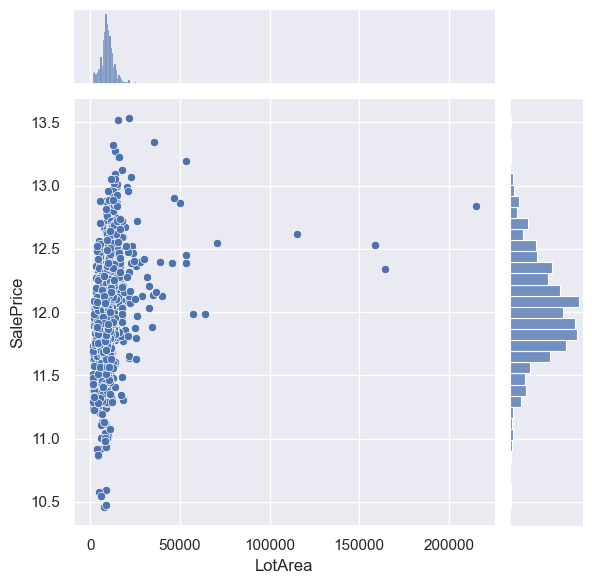

In [53]:
# LotArea vs SalePrice
sns.jointplot(x = df['LotArea'], y = df['SalePrice'])
plt.show()

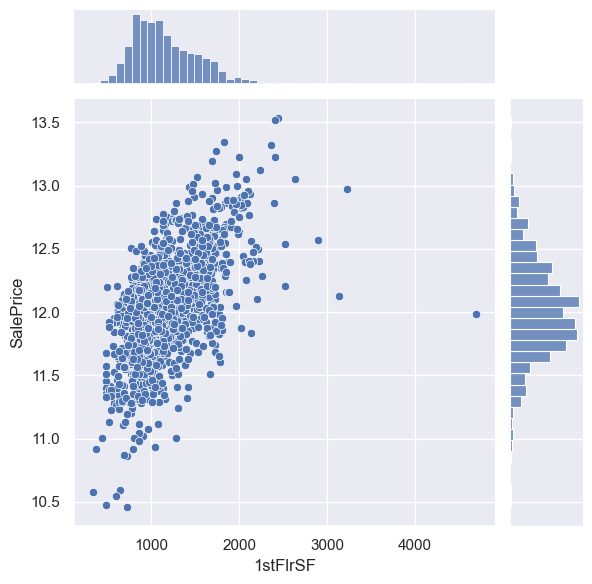

In [55]:
# 1stFlrSF vs SalePrice
sns.jointplot(x = df['1stFlrSF'], y = df['SalePrice'])
plt.show()

#### Since the dataset is small it isn't advisable to do remove outliers.

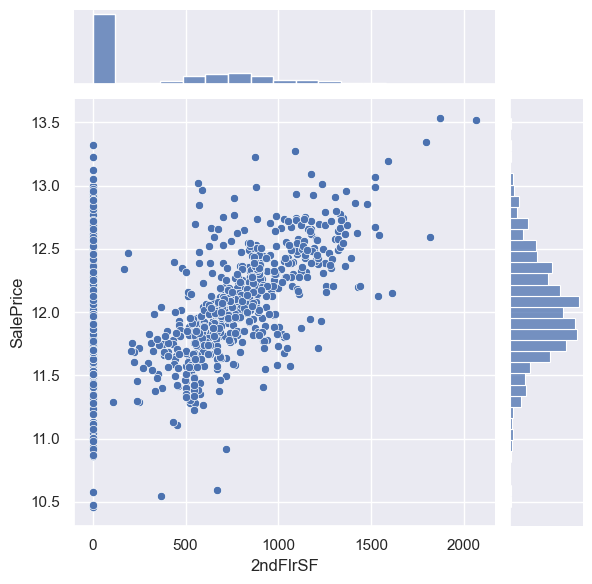

In [56]:
# 2ndFlrSF vs SalePrice
sns.jointplot(x = df['2ndFlrSF'], y = df['SalePrice'])
plt.show()

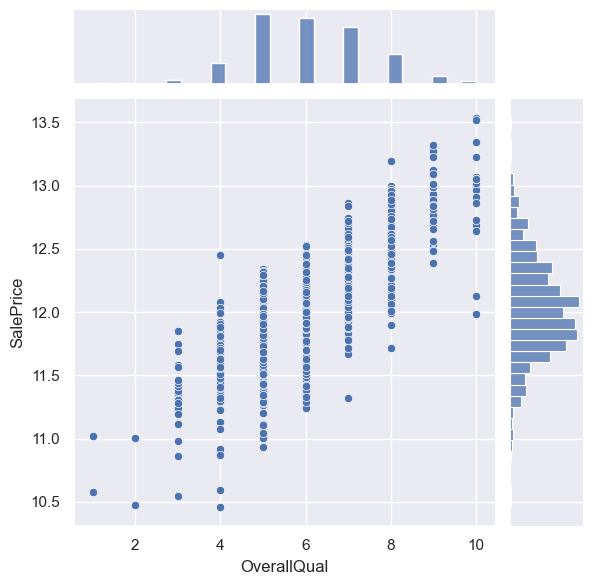

In [57]:
# OverallQual vs SalePrice
sns.jointplot(x = df['OverallQual'], y = df['SalePrice'])
plt.show()

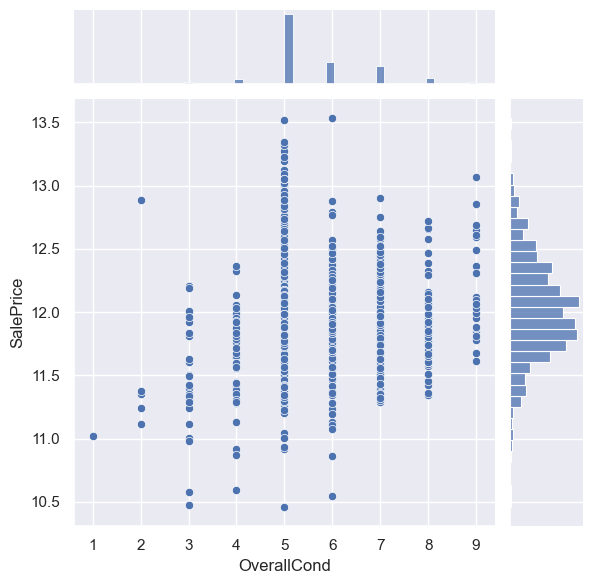

In [58]:
# OverallCond vs SalePrice
sns.jointplot(x=df['OverallCond'], y = df['SalePrice'])
plt.show()

#### Inference- Sales price increases as Sq. Ft area increases for both First and second floor.

### Introducing new cloumns
We can create a new column by Property Age by year sold minus year built. This is help us get insights what age properties are hot in market.

In [60]:
df['PropAge'] = (df['YrSold'] - df['YearBuilt'])
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... PoolQC Fence MiscFeature MiscVal MoSold YrSold  \
0         Lvl    AllPub  ...   none  none        none       0      2   2008   
1         Lvl    AllPub  ...   none  none        none       0      5   2007   
2         Lvl    AllPub  ...   none  none        none       0      9   2008   
3         Lvl    AllPub  ...   none  none        none       0      2   2006   
4         Lvl    AllPub  ...   none  none        none       0     12   2008   

  SaleType  SaleCondition  SalePrice  PropAge  
0       WD         Normal  12.247699        5  
1       WD         Normal  12.109016       31  
2       WD         Normal  12.317171        7  
3       WD        Abnorml  11.849405       91  
4       WD         Normal  12.429220        8  

[5 rows x 78 columns]

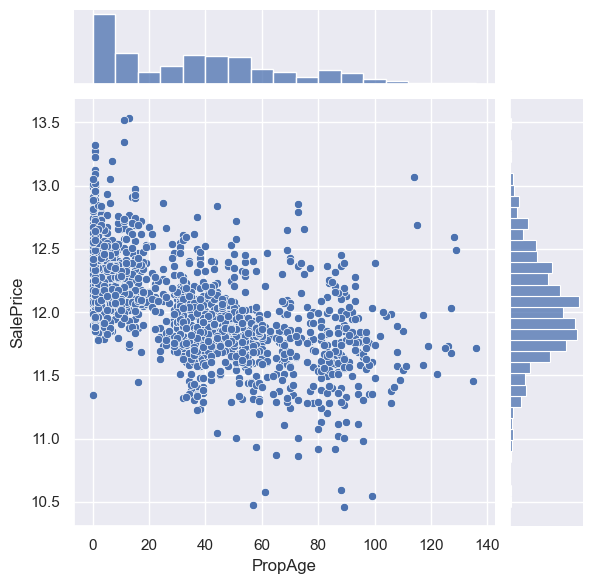

In [61]:
# PropAge vs SalePrice
sns.jointplot(x = df['PropAge'], y = df['SalePrice'])
plt.show()

#### New properties are more in demand.Increase in property age shows a decrease in sales price.

#### We will be dropping column Month sold and Year Sold, Year built and Year remodelled as we created new column PropAge

In [62]:
df = df.drop(['MoSold'], axis = 1)
df = df.drop(['YrSold'], axis = 1)
df = df.drop(['YearBuilt'], axis = 1)
df = df.drop(['YearRemodAdd'], axis = 1)
df.head()

Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  none      Reg   
1   2          20       RL         80.0     9600   Pave  none      Reg   
2   3          60       RL         68.0    11250   Pave  none      IR1   
3   4          70       RL         60.0     9550   Pave  none      IR1   
4   5          60       RL         84.0    14260   Pave  none      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC Fence MiscFeature  \
0         Lvl    AllPub  ...           0        0   none  none        none   
1         Lvl    AllPub  ...           0        0   none  none        none   
2         Lvl    AllPub  ...           0        0   none  none        none   
3         Lvl    AllPub  ...           0        0   none  none        none   
4         Lvl    AllPub  ...           0        0   none  none        none   

  MiscVal SaleType  SaleCondition  SalePrice PropAge  
0       0       WD         Normal  12.247699       5  
1       0       WD         Normal  12.109016      31  
2       0       WD         Normal  12.317171       7  
3       0       WD        Abnorml  11.849405      91  
4       0       WD         Normal  12.429220       8  

[5 rows x 74 columns]

#### Checking Street and utilities for value count to determine variance

In [65]:
df.Street.value_counts()

Street
Pave    1454
Grvl       6
Name: count, dtype: int64

In [67]:
df.Utilities.value_counts()

Utilities
AllPub    1459
NoSeWa       1
Name: count, dtype: int64

In [68]:
# We can also drop columns that show very low variance and thus not required for predictions
df = df.drop(['Street'], axis = 1)
df = df.drop(['Utilities'], axis = 1)

#### Checking for Null values in other columns

In [70]:

# 'Condition2', 'Heating', 'PoolQC', 'RoofMatl', 'BsmtCond', 'GarageQual', 'GarageCond', 'MiscVal', '3SsnPorch', 'FireplaceQu', 'BsmtHalfBath', 'BsmtFinSF2', 'Alley', 'MiscFeature', 'Fence', 'Functional'
l2= df.select_dtypes(include=['float64', 'int64'])
l2

Id  MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  \
0        1          60         65.0     8450            7            5   
1        2          20         80.0     9600            6            8   
2        3          60         68.0    11250            7            5   
3        4          70         60.0     9550            7            5   
4        5          60         84.0    14260            8            5   
...    ...         ...          ...      ...          ...          ...   
1455  1456          60         62.0     7917            6            5   
1456  1457          20         85.0    13175            6            6   
1457  1458          70         66.0     9042            7            9   
1458  1459          20         68.0     9717            5            6   
1459  1460          20         75.0     9937            5            6   

      MasVnrArea  BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  ...  GarageArea  \
0          196.0         706           0          856  ...         548   
1            0.0         978           0         1262  ...         460   
2          162.0         486           0          920  ...         608   
3            0.0         216           0          756  ...         642   
4          350.0         655           0         1145  ...         836   
...          ...         ...         ...          ...  ...         ...   
1455         0.0           0           0          953  ...         460   
1456       119.0         790         163         1542  ...         500   
1457         0.0         275           0         1152  ...         252   
1458         0.0          49        1029         1078  ...         240   
1459         0.0         830         290         1256  ...         276   

      WoodDeckSF  OpenPorchSF  EnclosedPorch  3SsnPorch  ScreenPorch  \
0              0           61              0          0            0   
1            298            0              0          0            0   
2              0           42              0          0            0   
3              0           35            272          0            0   
4            192           84              0          0            0   
...          ...          ...            ...        ...          ...   
1455           0           40              0          0            0   
1456         349            0              0          0            0   
1457           0           60              0          0            0   
1458         366            0            112          0            0   
1459         736           68              0          0            0   

      PoolArea  MiscVal  SalePrice  PropAge  
0            0        0  12.247699        5  
1            0        0  12.109016       31  
2            0        0  12.317171        7  
3            0        0  11.849405       91  
4            0        0  12.429220        8  
...        ...      ...        ...      ...  
1455         0        0  12.072547        8  
1456         0        0  12.254868       32  
1457         0     2500  12.493133       69  
1458         0        0  11.864469       60  
1459         0        0  11.901590       43  

[1460 rows x 31 columns]

In [71]:
for i in l2:
    print(df[i].value_counts())

Id
1       1
982     1
980     1
979     1
978     1
       ..
485     1
484     1
483     1
482     1
1460    1
Name: count, Length: 1460, dtype: int64
MSSubClass
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: count, dtype: int64
LotFrontage
69.0     270
60.0     143
70.0      70
80.0      69
50.0      57
        ... 
137.0      1
141.0      1
38.0       1
140.0      1
46.0       1
Name: count, Length: 110, dtype: int64
LotArea
7200     25
9600     24
6000     17
9000     14
8400     14
         ..
14601     1
13682     1
4058      1
17104     1
9717      1
Name: count, Length: 1073, dtype: int64
OverallQual
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: count, dtype: int64
OverallCond
5    821
6    252
7    205
8     72
4     57
3     25
9     22
2      5
1      1
Name: count, dtype: int64
MasVnrArea
0.0

In [72]:
#These Columns were having high null values, some of which were imputed. After imputing, it was found that there was very little variance in the data. So we have decided to drop these columns.
df = df.drop(['PoolQC','MiscVal', 'Alley', 'RoofMatl', 'Condition2', 'Heating', 'GarageCond', 'Fence', 'Functional' ], axis = 1)

In [73]:
# checking shape again
df.shape

(1460, 63)

### Data Preparation

In [74]:
# Drop 'Id' from Dataframe

df = df.drop(['Id'], axis=1)
df.head()

MSSubClass MSZoning  LotFrontage  LotArea LotShape LandContour LotConfig  \
0          60       RL         65.0     8450      Reg         Lvl    Inside   
1          20       RL         80.0     9600      Reg         Lvl       FR2   
2          60       RL         68.0    11250      IR1         Lvl    Inside   
3          70       RL         60.0     9550      IR1         Lvl    Corner   
4          60       RL         84.0    14260      IR1         Lvl       FR2   

  LandSlope Neighborhood Condition1  ... OpenPorchSF EnclosedPorch  3SsnPorch  \
0       Gtl      CollgCr       Norm  ...          61             0          0   
1       Gtl      Veenker      Feedr  ...           0             0          0   
2       Gtl      CollgCr       Norm  ...          42             0          0   
3       Gtl      Crawfor       Norm  ...          35           272          0   
4       Gtl      NoRidge       Norm  ...          84             0          0   

   ScreenPorch PoolArea MiscFeature SaleType SaleCondition  SalePrice PropAge  
0            0        0        none       WD        Normal  12.247699       5  
1            0        0        none       WD        Normal  12.109016      31  
2            0        0        none       WD        Normal  12.317171       7  
3            0        0        none       WD       Abnorml  11.849405      91  
4            0        0        none       WD        Normal  12.429220       8  

[5 rows x 62 columns]

In [75]:
#type of each feature in data: int, float, object
types = df.dtypes
#numerical values are either type int or float
numeric_type = types[(types == 'int64') | (types == float)] 
#categorical values are type object
categorical_type = types[types == object]

In [76]:
pd.DataFrame(types).reset_index().set_index(0).reset_index()[0].value_counts()

0
object     33
int64      26
float64     3
Name: count, dtype: int64

In [77]:
#we should convert numeric_type to a list to make it easier to work with
numerical_columns = list(numeric_type.index)
print(numerical_columns)

['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'SalePrice', 'PropAge']


In [78]:
#Categorical columns
categorical_columns = list(categorical_type.index)
print(categorical_columns)

['MSZoning', 'LotShape', 'LandContour', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'BldgType', 'HouseStyle', 'RoofStyle', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 'PavedDrive', 'MiscFeature', 'SaleType', 'SaleCondition']


#### Creating Dummy columns to convert categorical into numerical

In [79]:
df = pd.get_dummies(df, drop_first=True )
df.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 211 columns]

In [81]:
X = df.drop(['SalePrice'], axis=1)

X.head()

MSSubClass  LotFrontage  LotArea  OverallQual  OverallCond  MasVnrArea  \
0          60         65.0     8450            7            5       196.0   
1          20         80.0     9600            6            8         0.0   
2          60         68.0    11250            7            5       162.0   
3          70         60.0     9550            7            5         0.0   
4          60         84.0    14260            8            5       350.0   

   BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
0         706           0          856       856  ...           False   
1         978           0         1262      1262  ...           False   
2         486           0          920       920  ...           False   
3         216           0          756       961  ...           False   
4         655           0         1145      1145  ...           False   

   SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
0           False         False         False         True   
1           False         False         False         True   
2           False         False         False         True   
3           False         False         False         True   
4           False         False         False         True   

   SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
0                  False                 False                 False   
1                  False                 False                 False   
2                  False                 False                 False   
3                  False                 False                 False   
4                  False                 False                 False   

   SaleCondition_Normal  SaleCondition_Partial  
0                  True                  False  
1                  True                  False  
2                  True                  False  
3                 False                  False  
4                  True                  False  

[5 rows x 210 columns]

In [82]:
# Putting response variable to y
y = df['SalePrice']

y.head()

0    12.247699
1    12.109016
2    12.317171
3    11.849405
4    12.429220
Name: SalePrice, dtype: float64

In [83]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=50)

In [84]:
from sklearn.preprocessing import StandardScaler

In [85]:
scaler = StandardScaler()

X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_train[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']] = scaler.fit_transform(X_test[['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'Fireplaces', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'PropAge']])

In [86]:
X_train.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
175    -0.870387     0.637608  0.166080    -0.059996     1.252715   -0.575015   
1408    0.304785    -0.424957 -0.261043    -1.501313     1.252715   -0.575015   
1148   -0.165284    -0.026495 -0.439778     0.660663     1.252715   -0.575015   
861     3.125199     0.239147  0.079341    -0.780655    -1.406374   -0.575015   
220    -0.870387     0.150599 -0.151525     0.660663    -0.520011   -0.575015   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
175     0.085426   -0.283127     0.347365  2.572160  ...           False   
1408   -0.943351   -0.283127    -0.973680 -1.069794  ...           False   
1148   -0.943351   -0.283127    -1.087563 -1.504156  ...           False   
861     0.870488   -0.283127    -0.023894 -0.303879  ...           False   
220    -0.943351   -0.283127     1.021554  0.875837  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
175            False         False         False         True   
1408           False         False         False         True   
1148           False         False         False         True   
861            False         False         False         True   
220            False          True         False        False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
175                   False                 False                 False   
1408                  False                 False                 False   
1148                  False                 False                 False   
861                   False                 False                 False   
220                   False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
175                   True                  False  
1408                  True                  False  
1148                  True                  False  
861                   True                  False  
220                  False                   True  

[5 rows x 210 columns]

In [87]:
X_test.head()

MSSubClass  LotFrontage   LotArea  OverallQual  OverallCond  MasVnrArea  \
930    -0.879672     0.126209 -0.211538     1.358461    -0.509551   -0.560080   
530     0.559791     0.709123  0.029981    -0.099887    -0.509551    0.597117   
1291    2.479076    -2.399751 -1.583933    -0.829061     1.350309    0.856033   
1385   -0.159940    -1.476804 -0.872447    -1.558235     2.280239   -0.560080   
305    -0.879672     0.466242  0.065215     1.358461    -0.509551    0.739785   

      BsmtFinSF1  BsmtFinSF2  TotalBsmtSF  1stFlrSF  ...  SaleType_ConLI  \
930    -1.009468   -0.301886     0.899165  0.771223  ...           False   
530     0.743814   -0.301886     0.887692  0.884656  ...           False   
1291   -0.518001   -0.301886    -1.019124 -1.434127  ...           False   
1385    0.634091   -0.301886    -0.638220 -0.996222  ...           False   
305     2.300508   -0.301886     2.124484  2.179903  ...           False   

      SaleType_ConLw  SaleType_New  SaleType_Oth  SaleType_WD  \
930            False         False         False         True   
530            False         False         False         True   
1291           False         False         False         True   
1385           False         False         False         True   
305            False         False         False         True   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Family  \
930                   False                 False                 False   
530                   False                 False                 False   
1291                  False                 False                 False   
1385                  False                 False                 False   
305                   False                 False                 False   

      SaleCondition_Normal  SaleCondition_Partial  
930                   True                  False  
530                  False                  False  
1291                  True                  False  
1385                  True                  False  
305                   True                  False  

[5 rows x 210 columns]

### Model Building and Evaluation

#### Linear Regression

In [88]:
# Importing RFE and LinearRegression
# Since there are more variables to be analysed, we will used the automated feature elimination process (RFE)

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [91]:
# Running RFE 
# Since there are more than 250 variables for analysis, we will run RFE to select some that have high predictive power
lm = LinearRegression()
lm.fit(X_train, y_train)
 # running RFE for top 100 variables
rfe =  RFE(estimator=LinearRegression(), n_features_to_select=100)           
rfe = rfe.fit(X_train, y_train)

In [92]:
# Check the ranks
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('MSSubClass', False, 104),
 ('LotFrontage', False, 94),
 ('LotArea', False, 7),
 ('OverallQual', True, 1),
 ('OverallCond', True, 1),
 ('MasVnrArea', False, 100),
 ('BsmtFinSF1', False, 36),
 ('BsmtFinSF2', False, 98),
 ('TotalBsmtSF', False, 87),
 ('1stFlrSF', True, 1),
 ('2ndFlrSF', True, 1),
 ('LowQualFinSF', True, 1),
 ('GrLivArea', True, 1),
 ('BsmtFullBath', False, 34),
 ('BsmtHalfBath', False, 109),
 ('FullBath', False, 44),
 ('HalfBath', False, 49),
 ('BedroomAbvGr', False, 70),
 ('KitchenAbvGr', False, 73),
 ('Fireplaces', False, 74),
 ('GarageArea', True, 1),
 ('WoodDeckSF', False, 86),
 ('OpenPorchSF', False, 103),
 ('EnclosedPorch', False, 79),
 ('3SsnPorch', False, 96),
 ('ScreenPorch', False, 75),
 ('PoolArea', False, 59),
 ('PropAge', True, 1),
 ('MSZoning_FV', True, 1),
 ('MSZoning_RH', True, 1),
 ('MSZoning_RL', True, 1),
 ('MSZoning_RM', True, 1),
 ('LotShape_IR2', False, 37),
 ('LotShape_IR3', True, 1),
 ('LotShape_Reg', False, 89),
 ('LandContour_HLS', False, 2),


In [93]:
# Select the top 100 variables

col = X_train.columns[rfe.support_]
col

Index(['OverallQual', 'OverallCond', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'GarageArea', 'PropAge', 'MSZoning_FV', 'MSZoning_RH',
       'MSZoning_RL', 'MSZoning_RM', 'LotShape_IR3', 'LotConfig_CulDSac',
       'LotConfig_FR3', 'LandSlope_Sev', 'Neighborhood_Blueste',
       'Neighborhood_BrDale', 'Neighborhood_BrkSide', 'Neighborhood_CollgCr',
       'Neighborhood_Edwards', 'Neighborhood_Gilbert', 'Neighborhood_IDOTRR',
       'Neighborhood_MeadowV', 'Neighborhood_Mitchel', 'Neighborhood_NAmes',
       'Neighborhood_NPkVill', 'Neighborhood_NWAmes', 'Neighborhood_NridgHt',
       'Neighborhood_OldTown', 'Neighborhood_Sawyer', 'Neighborhood_SawyerW',
       'Neighborhood_StoneBr', 'Condition1_Norm', 'Condition1_PosN',
       'Condition1_RRAe', 'Condition1_RRAn', 'Condition1_RRNe',
       'Condition1_RRNn', 'BldgType_Twnhs', 'BldgType_TwnhsE',
       'HouseStyle_2.5Fin', 'HouseStyle_2.5Unf', 'RoofStyle_Mansard',
       'RoofStyle_Shed', 'Exterior1st_BrkComm', 'Exter

In [94]:
X_train.columns[~rfe.support_]

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       ...
       'GarageQual_TA', 'GarageQual_none', 'PavedDrive_P', 'PavedDrive_Y',
       'MiscFeature_TenC', 'MiscFeature_none', 'SaleType_ConLI',
       'SaleType_ConLw', 'SaleType_WD', 'SaleCondition_Family'],
      dtype='object', length=110)

In [95]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [96]:
X_train_rfe = pd.DataFrame(X_train[col])

In [97]:
X_train_rfe.head()

OverallQual  OverallCond  1stFlrSF  2ndFlrSF  LowQualFinSF  GrLivArea  \
175     -0.059996     1.252715  2.572160 -0.797551     -0.121406   1.229791   
1408    -1.501313     1.252715 -1.069794  0.630928     -0.121406  -0.279140   
1148     0.660663     1.252715 -1.504156  0.440311     -0.121406  -0.757443   
861     -0.780655    -1.406374 -0.303879 -0.797551     -0.121406  -0.894101   
220      0.660663    -0.520011  0.875837 -0.797551     -0.121406  -0.022906   

      GarageArea   PropAge  MSZoning_FV  MSZoning_RH  ...  MiscFeature_Shed  \
175     0.478002  0.660066        False        False  ...             False   
1408    0.256615  2.066739        False        False  ...             False   
1148   -0.850325  1.477899        False        False  ...             False   
861     0.145921  0.267506        False        False  ...             False   
220     0.934615 -1.204594        False        False  ...             False   

      SaleType_CWD  SaleType_Con  SaleType_ConLD  SaleType_New  SaleType_Oth  \
175          False         False           False         False         False   
1408         False         False           False         False         False   
1148         False         False           False         False         False   
861          False         False           False         False         False   
220          False         False           False          True         False   

      SaleCondition_AdjLand  SaleCondition_Alloca  SaleCondition_Normal  \
175                   False                 False                  True   
1408                  False                 False                  True   
1148                  False                 False                  True   
861                   False                 False                  True   
220                   False                 False                 False   

      SaleCondition_Partial  
175                   False  
1408                  False  
1148                  False  
861                   False  
220                    True  

[5 rows x 100 columns]

In [98]:
X_train_rfe.shape

(1021, 100)

In [100]:
import sklearn.metrics as metrics

In [101]:
# predict
y_train_pred = lm.predict(X_train)
metrics.r2_score(y_true=y_train, y_pred=y_train_pred)

0.9274570124184756

In [102]:
y_test_pred = lm.predict(X_test)
metrics.r2_score(y_true=y_test, y_pred=y_test_pred)

-1.1030804932282864e+20

#### R2 can have negative values, which mean that the regression performed poorly. We will move to Lasso and Ridge Regression to predict prices

#### Lasso Regression

In [103]:
# Checking the dimension of X_train & y_train
print("X_train", X_train.shape)
print("y_train", y_train.shape)

X_train (1021, 210)
y_train (1021,)


In [107]:
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

In [108]:
# Applying Lasso

# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}
lasso = Lasso()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = lasso, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            

model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [109]:
# cv_results
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=1]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.281964  1.884959e-02         0.006249        0.007654      0.0001   
1       0.071850  1.249765e-02         0.006248        0.007653       0.001   
2       0.031240  3.371748e-07         0.006247        0.007651        0.01   
3       0.031346  2.014200e-04         0.015596        0.000045        0.05   
4       0.031239  1.803176e-06         0.000000        0.000000         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.100802          -0.083278          -0.102193   
1   {'alpha': 0.001}          -0.090742          -0.084638          -0.097269   
2    {'alpha': 0.01}          -0.104529          -0.098994          -0.100961   
3    {'alpha': 0.05}          -0.137308          -0.122383          -0.132828   
4     {'alpha': 0.1}          -0.168374          -0.146599          -0.166323   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.103915  ...        -0.097067        0.007496                2   
1          -0.103641  ...        -0.092342        0.007235                1   
2          -0.112491  ...        -0.101724        0.006832                3   
3          -0.139735  ...        -0.129816        0.008804                4   
4          -0.180801  ...        -0.162134        0.012886                5   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.072209           -0.077769           -0.073539   
1           -0.081965           -0.085092           -0.081043   
2           -0.099932           -0.102590           -0.098948   
3           -0.130587           -0.133071           -0.129419   
4           -0.162902           -0.163147           -0.160035   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.064746           -0.073019         -0.072257         0.004220  
1           -0.073980           -0.082378         -0.080892         0.003709  
2           -0.088059           -0.101095         -0.098125         0.005177  
3           -0.119567           -0.132747         -0.129078         0.004945  
4           -0.157388           -0.164734         -0.161641         0.002611  

[5 rows x 21 columns]

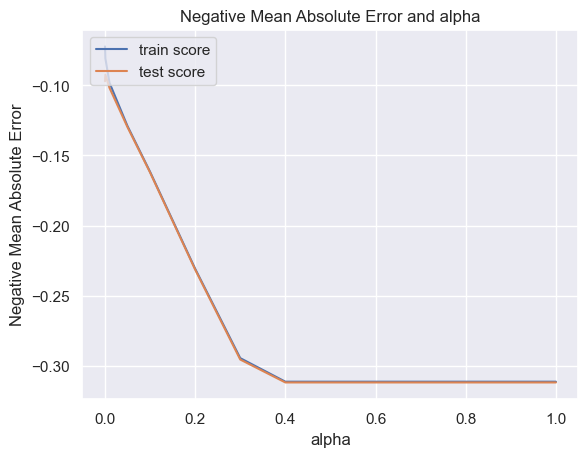

In [110]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('float32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### From the above graph we can see that the Negative Mean Absolute Error is quite low at alpha = 0.4 and stabilises thereafter, but we will choose a low value of alpha to balance the trade-off between Bias-Variance and to get the coefficients of smallest of features.

In [111]:
# At alpha = 0.01, even the smallest of negative coefficients that have some predictive power towards 'SalePrice' have been generated

alpha = 0.01
lasso = Lasso(alpha=alpha)

lasso.fit(X_train, y_train)
lasso.coef_

array([-0.01846808,  0.        ,  0.01472642,  0.13153067,  0.04861812,
        0.        ,  0.00642838,  0.        ,  0.01708641,  0.00568936,
        0.        , -0.        ,  0.11748484,  0.02913443,  0.        ,
        0.02153848,  0.00186395,  0.        , -0.00573713,  0.02609711,
        0.04518928,  0.00852854,  0.        ,  0.        ,  0.        ,
        0.00787916, -0.01974317, -0.08982504,  0.        ,  0.        ,
        0.00991463, -0.        ,  0.        , -0.        , -0.        ,
        0.        ,  0.        , -0.        ,  0.        , -0.        ,
       -0.        , -0.        ,  0.        ,  0.        , -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
       -0.        , -0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        , -0.        ,  0.        ,  0.        ,
       -0.        ,  0.        , -0.        , -0.        ,  0.        ,
        0.        ,  0.        ,  0.        , -0.        ,  0.  

#### The advantage of this technique is clearly visible here as Lasso brings the coefficients of insignificant features to zero

In [112]:
# lasso model parameters
model_parameters = list(lasso.coef_ )
model_parameters.insert(0, lasso.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 12.011),
 ('MSSubClass', -0.018),
 ('LotFrontage', 0.0),
 ('LotArea', 0.015),
 ('OverallQual', 0.132),
 ('OverallCond', 0.049),
 ('MasVnrArea', 0.0),
 ('BsmtFinSF1', 0.006),
 ('BsmtFinSF2', 0.0),
 ('TotalBsmtSF', 0.017),
 ('1stFlrSF', 0.006),
 ('2ndFlrSF', 0.0),
 ('LowQualFinSF', -0.0),
 ('GrLivArea', 0.117),
 ('BsmtFullBath', 0.029),
 ('BsmtHalfBath', 0.0),
 ('FullBath', 0.022),
 ('HalfBath', 0.002),
 ('BedroomAbvGr', 0.0),
 ('KitchenAbvGr', -0.006),
 ('Fireplaces', 0.026),
 ('GarageArea', 0.045),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.0),
 ('EnclosedPorch', 0.0),
 ('3SsnPorch', 0.0),
 ('ScreenPorch', 0.008),
 ('PoolArea', -0.02),
 ('PropAge', -0.09),
 ('MSZoning_FV', 0.0),
 ('MSZoning_RH', 0.0),
 ('MSZoning_RL', 0.01),
 ('MSZoning_RM', -0.0),
 ('LotShape_IR2', 0.0),
 ('LotShape_IR3', -0.0),
 ('LotShape_Reg', -0.0),
 ('LandContour_HLS', 0.0),
 ('LandContour_Low', 0.0),
 ('LandContour_Lvl', -0.0),
 ('LotConfig_CulDSac', 0.0),
 ('LotConfig_FR2', -0.0),
 ('LotConfig_FR3

In [113]:
# lasso regression
lm = Lasso(alpha=0.01)
lm.fit(X_train, y_train)

# prediction on the test set(Using R2)
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.8611514104798453
0.8503345206857671


In [114]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.1537267940862057


#### The R2 values for Train and Test matches well, indicating an optimum model

In [115]:
# Creating a dataframe for the coefficients obtained from Lasso
mod = list(zip(cols, model_parameters))

In [116]:
para = pd.DataFrame(mod)
para.columns = ['Variable', 'Coeff']
para.head()

Variable   Coeff
0     constant  12.011
1   MSSubClass  -0.018
2  LotFrontage   0.000
3      LotArea   0.015
4  OverallQual   0.132

In [117]:
# sort the coefficients in ascending order
para = para.sort_values((['Coeff']), axis = 0, ascending = False)
para

Variable   Coeff
0            constant  12.011
4         OverallQual   0.132
13          GrLivArea   0.117
5         OverallCond   0.049
21         GarageArea   0.045
..                ...     ...
86  HouseStyle_SFoyer  -0.000
19       KitchenAbvGr  -0.006
1          MSSubClass  -0.018
27           PoolArea  -0.020
28            PropAge  -0.090

[211 rows x 2 columns]

In [118]:
# Chose variables whose coefficients are non-zero
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.011
4    OverallQual   0.132
13     GrLivArea   0.117
5    OverallCond   0.049
21    GarageArea   0.045
14  BsmtFullBath   0.029
20    Fireplaces   0.026
16      FullBath   0.022
9    TotalBsmtSF   0.017
3        LotArea   0.015
31   MSZoning_RL   0.010
22    WoodDeckSF   0.009
26   ScreenPorch   0.008
10      1stFlrSF   0.006
7     BsmtFinSF1   0.006
17      HalfBath   0.002
19  KitchenAbvGr  -0.006
1     MSSubClass  -0.018
27      PoolArea  -0.020
28       PropAge  -0.090

In [119]:
pred.shape

(20, 2)

#### Above 19 variables obtained from Lasso Regression can be concluded to have the strong effect on the SalePrice.

In [120]:
Lassso_var = list(pred['Variable'])
print(Lassso_var)

['constant', 'OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']


In [121]:
X_train_lasso = X_train[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']]
                        
X_train_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageArea  BsmtFullBath  \
175     -0.059996   1.229791     1.252715    0.478002      1.105326   
1408    -1.501313  -0.279140     1.252715    0.256615     -0.807450   
1148     0.660663  -0.757443     1.252715   -0.850325     -0.807450   
861     -0.780655  -0.894101    -1.406374    0.145921      1.105326   
220      0.660663  -0.022906    -0.520011    0.934615     -0.807450   

      Fireplaces  FullBath  TotalBsmtSF   LotArea  MSZoning_RL  WoodDeckSF  \
175     0.622339  0.786946     0.347365  0.166080         True   -0.740805   
1408   -0.935034 -1.006519    -0.973680 -0.261043        False   -0.740805   
1148    0.622339 -1.006519    -1.087563 -0.439778        False   -0.740805   
861    -0.935034 -1.006519    -0.023894  0.079341         True   -0.740805   
220    -0.935034  0.786946     1.021554 -0.151525         True    2.124358   

      ScreenPorch  1stFlrSF  BsmtFinSF1  HalfBath  KitchenAbvGr  MSSubClass  \
175     -0.260661  2.572160    0.085426 -0.751723     -0.212991   -0.870387   
1408     3.016768 -1.069794   -0.943351 -0.751723     -0.212991    0.304785   
1148    -0.260661 -1.504156   -0.943351 -0.751723     -0.212991   -0.165284   
861     -0.260661 -0.303879    0.870488  1.246998     -0.212991    3.125199   
220     -0.260661  0.875837   -0.943351 -0.751723     -0.212991   -0.870387   

      PoolArea   PropAge  
175  -0.062302  0.660066  
1408 -0.062302  2.066739  
1148 -0.062302  1.477899  
861  -0.062302  0.267506  
220  -0.062302 -1.204594

In [122]:
X_train_lasso.shape

(1021, 19)

In [124]:
X_test_lasso = X_test[['OverallQual', 'GrLivArea', 'OverallCond', 'GarageArea', 'BsmtFullBath', 'Fireplaces', 'FullBath', 'TotalBsmtSF', 'LotArea', 'MSZoning_RL', 'WoodDeckSF', 'ScreenPorch', '1stFlrSF', 'BsmtFinSF1', 'HalfBath', 'KitchenAbvGr', 'MSSubClass', 'PoolArea', 'PropAge']]
                        
X_test_lasso.head()

OverallQual  GrLivArea  OverallCond  GarageArea  BsmtFullBath  \
930      1.358461  -0.117457    -0.509551    0.657098     -0.851855   
530     -0.099887  -0.035051    -0.509551    0.608692      1.111895   
1291    -0.829061  -0.431748     1.350309   -1.017758     -0.851855   
1385    -1.558235  -0.715377     2.280239   -1.133933      1.111895   
305      1.358461   0.905907    -0.509551    2.002793      1.111895   

      Fireplaces  FullBath  TotalBsmtSF   LotArea  MSZoning_RL  WoodDeckSF  \
930    -0.987888  0.798671     0.899165 -0.211538         True   -0.019795   
530     0.551952  0.798671     0.887692  0.029981         True    0.924930   
1291   -0.987888  0.798671    -1.019124 -1.583933        False    0.627799   
1385   -0.987888 -1.072013    -0.638220 -0.872447        False   -0.781670   
305    -0.987888  0.798671     2.124484  0.065215         True    0.498280   

      ScreenPorch  1stFlrSF  BsmtFinSF1  HalfBath  KitchenAbvGr  MSSubClass  \
930     -0.293788  0.771223   -1.009468 -0.786336     -0.208108   -0.879672   
530     -0.293788  0.884656    0.743814 -0.786336     -0.208108    0.559791   
1291    -0.293788 -1.434127   -0.518001  1.181751     -0.208108    2.479076   
1385    -0.293788 -0.996222    0.634091 -0.786336     -0.208108   -0.159940   
305     -0.293788  2.179903    2.300508 -0.786336     -0.208108   -0.879672   

      PoolArea   PropAge  
930  -0.082098 -1.150291  
530  -0.082098 -0.539797  
1291 -0.082098  0.036781  
1385 -0.082098  1.766516  
305  -0.082098 -1.116375

### Ridge Regression

In [126]:
from sklearn.linear_model import Ridge

In [127]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100, 500, 1000 ]}


ridge = Ridge()

# cross validation
folds = 5
model_cv = GridSearchCV(estimator = ridge, 
                        param_grid = params, 
                        scoring= 'neg_mean_absolute_error', 
                        cv = folds, 
                        return_train_score=True,
                        verbose = 1)            
model_cv.fit(X_train, y_train) 

Fitting 5 folds for each of 28 candidates, totalling 140 fits


GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3,
                                   0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0,
                                   4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50,
                                   100, 500, 1000]},
             return_train_score=True, scoring='neg_mean_absolute_error',
             verbose=1)

In [128]:
cv_results = pd.DataFrame(model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=5]
cv_results.head()

mean_fit_time  std_fit_time  mean_score_time  std_score_time param_alpha  \
0       0.054081      0.061157         0.013025        0.003252      0.0001   
1       0.024994      0.007654         0.009372        0.007652       0.001   
2       0.020531      0.006376         0.012668        0.006337        0.01   
3       0.024531      0.007325         0.006247        0.007651        0.05   
4       0.026620      0.006217         0.004667        0.009334         0.1   

              params  split0_test_score  split1_test_score  split2_test_score  \
0  {'alpha': 0.0001}          -0.112880          -0.088780          -0.109044   
1   {'alpha': 0.001}          -0.112848          -0.088756          -0.109008   
2    {'alpha': 0.01}          -0.112540          -0.088513          -0.108679   
3    {'alpha': 0.05}          -0.111342          -0.087568          -0.107562   
4     {'alpha': 0.1}          -0.110118          -0.086711          -0.106622   

   split3_test_score  ...  mean_test_score  std_test_score  rank_test_score  \
0          -0.107845  ...        -0.104182        0.008405               27   
1          -0.107827  ...        -0.104147        0.008405               26   
2          -0.107671  ...        -0.103825        0.008404               25   
3          -0.107186  ...        -0.102751        0.008417               24   
4          -0.106758  ...        -0.101831        0.008401               23   

   split0_train_score  split1_train_score  split2_train_score  \
0           -0.070666           -0.075578           -0.072057   
1           -0.070668           -0.075579           -0.072058   
2           -0.070679           -0.075600           -0.072059   
3           -0.070725           -0.075740           -0.072087   
4           -0.070813           -0.075929           -0.072221   

   split3_train_score  split4_train_score  mean_train_score  std_train_score  
0           -0.062336           -0.071877         -0.070503         0.004400  
1           -0.062336           -0.071880         -0.070504         0.004400  
2           -0.062349           -0.071918         -0.070521         0.004403  
3           -0.062444           -0.072054         -0.070610         0.004411  
4           -0.062570           -0.072185         -0.070744         0.004426  

[5 rows x 21 columns]

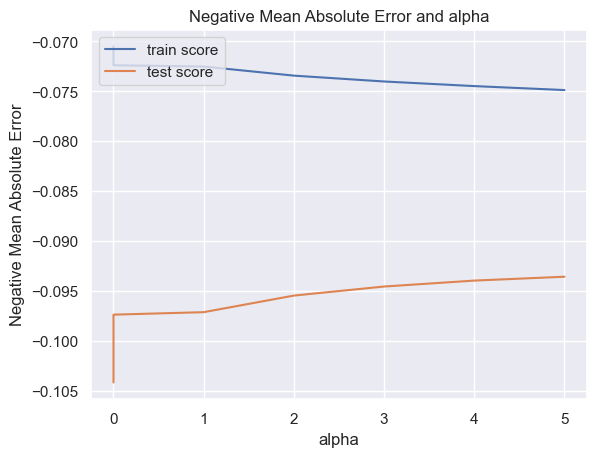

In [129]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.show()

#### since the Negative Mean Absolute Error stabilises at alpha = 2, we will choose this for further analysis

In [130]:
alpha = 2
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-0.01218585, -0.00610579,  0.02534541,  0.0791013 ,  0.05218363,
        0.00195746, -0.01119183,  0.00629395, -0.00715078,  0.04433613,
        0.04409968,  0.00201745,  0.06936302,  0.02845049,  0.00247524,
        0.03199257,  0.01928976,  0.01447869, -0.01025135, -0.0078909 ,
        0.02947842,  0.00946755,  0.0045857 ,  0.01113795,  0.00540014,
        0.01227269, -0.01496746, -0.04132032,  0.12511244,  0.13686444,
        0.11866854,  0.08235231,  0.02110863, -0.08478443,  0.0049174 ,
        0.0181384 ,  0.00328706,  0.01952102,  0.03081406, -0.04108315,
       -0.04766731, -0.01567835,  0.01093728, -0.06062229, -0.04317427,
       -0.0549548 ,  0.01909832,  0.04604876, -0.01844373,  0.10017926,
       -0.09817376, -0.01805679, -0.09238923, -0.14377117, -0.03745842,
       -0.01859494,  0.0019118 , -0.03895856,  0.07514912,  0.07829148,
       -0.04883352,  0.01191049, -0.014205  , -0.0044678 ,  0.03034602,
        0.10359548,  0.01251041,  0.03637216, -0.00764673,  0.05

In [131]:
# ridge model parameters
model_parameters = list(ridge.coef_)
model_parameters.insert(0, ridge.intercept_)
model_parameters = [round(x, 3) for x in model_parameters]
cols = X.columns
cols = cols.insert(0, "constant")
list(zip(cols, model_parameters))

[('constant', 11.728),
 ('MSSubClass', -0.012),
 ('LotFrontage', -0.006),
 ('LotArea', 0.025),
 ('OverallQual', 0.079),
 ('OverallCond', 0.052),
 ('MasVnrArea', 0.002),
 ('BsmtFinSF1', -0.011),
 ('BsmtFinSF2', 0.006),
 ('TotalBsmtSF', -0.007),
 ('1stFlrSF', 0.044),
 ('2ndFlrSF', 0.044),
 ('LowQualFinSF', 0.002),
 ('GrLivArea', 0.069),
 ('BsmtFullBath', 0.028),
 ('BsmtHalfBath', 0.002),
 ('FullBath', 0.032),
 ('HalfBath', 0.019),
 ('BedroomAbvGr', 0.014),
 ('KitchenAbvGr', -0.01),
 ('Fireplaces', -0.008),
 ('GarageArea', 0.029),
 ('WoodDeckSF', 0.009),
 ('OpenPorchSF', 0.005),
 ('EnclosedPorch', 0.011),
 ('3SsnPorch', 0.005),
 ('ScreenPorch', 0.012),
 ('PoolArea', -0.015),
 ('PropAge', -0.041),
 ('MSZoning_FV', 0.125),
 ('MSZoning_RH', 0.137),
 ('MSZoning_RL', 0.119),
 ('MSZoning_RM', 0.082),
 ('LotShape_IR2', 0.021),
 ('LotShape_IR3', -0.085),
 ('LotShape_Reg', 0.005),
 ('LandContour_HLS', 0.018),
 ('LandContour_Low', 0.003),
 ('LandContour_Lvl', 0.02),
 ('LotConfig_CulDSac', 0.031),
 

In [132]:
# ridge regression
lm = Ridge(alpha=2)
lm.fit(X_train, y_train)

# predict
y_train_pred = lm.predict(X_train)
print(metrics.r2_score(y_true=y_train, y_pred=y_train_pred))
y_test_pred = lm.predict(X_test)
print(metrics.r2_score(y_true=y_test, y_pred=y_test_pred))

0.9228456089456072
0.8758497882084672


In [133]:
print('RMSE :', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

RMSE : 0.14001110467908734


#### It is visible that the Rdige model performance is better than Lasso. The train and the test scores are close not as close as Lasso

In [134]:
# Create a dataframe for Ridge Coefficients
mod_ridge = list(zip(cols, model_parameters))

In [135]:
paraRFE = pd.DataFrame(mod_ridge)
paraRFE.columns = ['Variable', 'Coeff']
res=paraRFE.sort_values(by=['Coeff'], ascending = False)
res.head(20)

Variable   Coeff
0                constant  11.728
30            MSZoning_RH   0.137
29            MSZoning_FV   0.125
31            MSZoning_RL   0.119
66   Neighborhood_StoneBr   0.104
204          SaleType_Oth   0.104
135      Foundation_Stone   0.102
95    Exterior1st_BrkFace   0.101
50   Neighborhood_Crawfor   0.100
111   Exterior2nd_CmentBd   0.088
32            MSZoning_RM   0.082
4             OverallQual   0.079
203          SaleType_New   0.078
60   Neighborhood_NridgHt   0.078
91      RoofStyle_Mansard   0.077
59   Neighborhood_NoRidge   0.075
165          CentralAir_Y   0.070
13              GrLivArea   0.069
209  SaleCondition_Normal   0.068
207  SaleCondition_Alloca   0.065

In [136]:
# Sorting the coefficients in ascending order
paraRFE = paraRFE.sort_values((['Coeff']), axis = 0, ascending = False)
paraRFE

Variable   Coeff
0               constant  11.728
30           MSZoning_RH   0.137
29           MSZoning_FV   0.125
31           MSZoning_RL   0.119
66  Neighborhood_StoneBr   0.104
..                   ...     ...
79        BldgType_Twnhs  -0.093
83     HouseStyle_2.5Fin  -0.097
51  Neighborhood_Edwards  -0.098
94   Exterior1st_BrkComm  -0.103
54  Neighborhood_MeadowV  -0.144

[211 rows x 2 columns]

In [137]:
## since there were few coefficients at 0, we removed them from features
predRFE = pd.DataFrame(paraRFE[(paraRFE['Coeff'] != 0)])
predRFE

Variable   Coeff
0               constant  11.728
30           MSZoning_RH   0.137
29           MSZoning_FV   0.125
31           MSZoning_RL   0.119
66  Neighborhood_StoneBr   0.104
..                   ...     ...
79        BldgType_Twnhs  -0.093
83     HouseStyle_2.5Fin  -0.097
51  Neighborhood_Edwards  -0.098
94   Exterior1st_BrkComm  -0.103
54  Neighborhood_MeadowV  -0.144

[207 rows x 2 columns]

In [138]:
predRFE.shape

(207, 2)

## Conclusion

### Ridge Regression is better in terms of R2 values of Train and Test but my recommedation is to use Lasso since it brings and assigns a zero value to insignificant features.

### Ridge has 206 variable while Lasso suggests only 19. Easier to work with.  

In [139]:
### Assign the Features as x1, x2.....

pred.set_index(pd.Index(['C','x1', 'x2', 'x3', 'x4', 'x5' , 'x6', 'x7', 'x8', 'x9', 'x10', 'x11', 'x12', 'x13', 'x14', 'x15', 'x16','x17', 'x18', 'x19']), inplace = True) 
pred

Variable   Coeff
C        constant  12.011
x1    OverallQual   0.132
x2      GrLivArea   0.117
x3    OverallCond   0.049
x4     GarageArea   0.045
x5   BsmtFullBath   0.029
x6     Fireplaces   0.026
x7       FullBath   0.022
x8    TotalBsmtSF   0.017
x9        LotArea   0.015
x10   MSZoning_RL   0.010
x11    WoodDeckSF   0.009
x12   ScreenPorch   0.008
x13      1stFlrSF   0.006
x14    BsmtFinSF1   0.006
x15      HalfBath   0.002
x16  KitchenAbvGr  -0.006
x17    MSSubClass  -0.018
x18      PoolArea  -0.020
x19       PropAge  -0.090

### These are the final features that should be selected for predicting the price of house
### Hence the equation:
#### Log(Y) = C + 0.132(x1) + 0.117(x2) + 0.049(x3) + 0.045(x4) + 0.029(x5) + 0.026(x6) + 0.022(x7) + 0.017(x8) + 0.015(x9) + 0.010(x10) + 0.009(x11) + 0.008(x12) + 0.006(x13) + 0.006(x14) + 0.002(x15) - 0.006(x16) - 0.018(x17) - 0.020(x18) - 0.090(x19) + Error term(RSS + alpha * (sum of absolute value of coefficients)

### Suggestions for Surprise Housing is to keep a check on top five predictors affecting the price of the house found using Lasso Model

#### OverallQual	- Rates the overall material and finish of the house
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average
       5	Average
       4	Below Average
       3	Fair
       2	Poor
       1	Very Poor

#### GrLivArea	- Above grade (ground) living area square feet

#### OverallCond - Rates the overall condition of the house
      10	Very Excellent
       9	Excellent
       8	Very Good
       7	Good
       6	Above Average	
       5	Average
       4	Below Average	
       3	Fair
       2	Poor
       1	Very Poor
       
#### GarageArea	- Size of garage in square feet

#### BsmtFullBath	- Basement full bathrooms

#### End of Assigment 1

### Assignment 2 Subjective Questions
##### Code to get output
###### Question1

In [142]:
# Build final Ridge model using double of lambda=0.002
ridge=Ridge(alpha=0.002)
ridge.fit(X_train, y_train)

Ridge(alpha=0.002)

In [144]:
#Predict using Ridge Regression on test set
y_test_pred=ridge.predict(X_test)

In [146]:
#R-Square value on test set
print(metrics.r2_score(y_test, y_test_pred))

0.8598779938804781


Observation: There is a slight reduction in R-Square value.

In [148]:
# Build final Lasso model using double of lambda=0.002
lasso=Lasso(alpha=0.002)
lasso.fit(X_train, y_train)

Lasso(alpha=0.002)

In [150]:
#Predict using Ridge Regression on test set
y_test_pred=lasso.predict(X_test)

In [151]:
#R-Square value on test set
print(metrics.r2_score(y_test, y_test_pred))

0.8659845854838633


In [152]:
#Lasso model selected 13 out of 219 variables
len(lasso.coef_[lasso.coef_>0])

39

In [154]:
# List of significant variables selected by Lasso model
pred = pd.DataFrame(para[(para['Coeff'] != 0)])
pred

Variable   Coeff
0       constant  12.011
4    OverallQual   0.132
13     GrLivArea   0.117
5    OverallCond   0.049
21    GarageArea   0.045
14  BsmtFullBath   0.029
20    Fireplaces   0.026
16      FullBath   0.022
9    TotalBsmtSF   0.017
3        LotArea   0.015
31   MSZoning_RL   0.010
22    WoodDeckSF   0.009
26   ScreenPorch   0.008
10      1stFlrSF   0.006
7     BsmtFinSF1   0.006
17      HalfBath   0.002
19  KitchenAbvGr  -0.006
1     MSSubClass  -0.018
27      PoolArea  -0.020
28       PropAge  -0.090